In [308]:
import numpy as np
#from derivative import *

from zeta import *




In [332]:
d = np.array([2,1,0])

In [333]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]


In [334]:
z_d_plot = np.copy(z_d_results)
q_2_plot = np.copy(q_2)

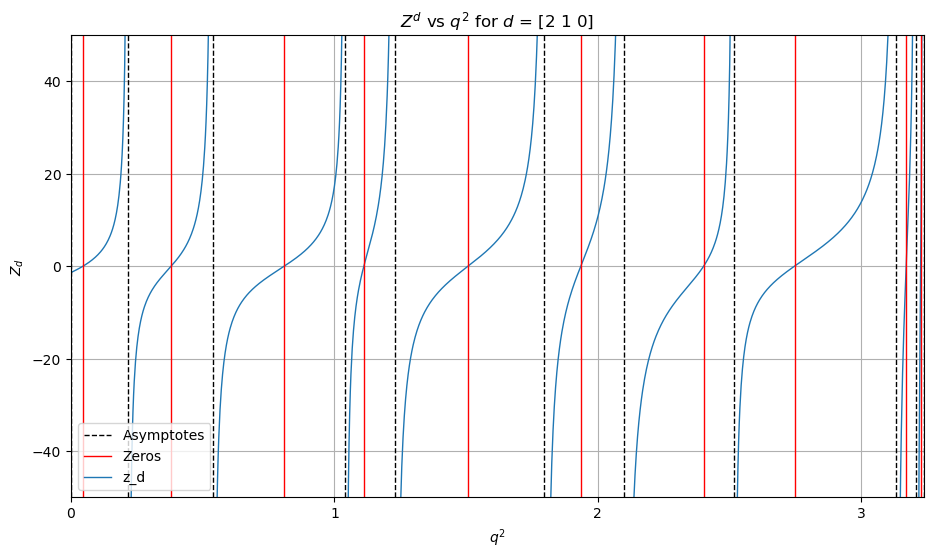

In [335]:
from matplotlib import pyplot as plt
    
for i in asymototes:
    q_2_plot= np.insert(q_2_plot, np.argmax(q_2_plot >= i),i)
    z_d_plot = np.insert(z_d_plot, np.argmax(q_2_plot >= i),np.nan)

plt.figure(figsize = (11,6))
plt.plot(q_2_plot, z_d_plot, label = "z_d", linewidth = 1)
#insert first asymptotes with black dotted lines, thickness 1 pt
for i in asymototes:
    plt.axvline(i, linestyle = "--", color = "black", linewidth = 1, label = "Asymptotes")

#insert zeros with red dotted lines, thickness 1 pt
for i in roots:
    plt.axvline(i, color = "red", linewidth = 1, label = "Zeros")

#label
plt.xlabel("$q^2$")
plt.ylabel("$Z_d$")
plt.title("$Z^d$ vs $q^2$ for $d$ = {} ". format( d))



#legend
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')


plt.ylim(-50,50)
#tickmarks

#set x tickmarks, 100
max_x_asy = 10
max_x = asymototes[max_x_asy]
plt.xlim(0,max_x)
steps = np.ceil(max_x/50)
plt.xticks(np.arange(0,max_x, steps))

plt.grid()

In [473]:

lst = data.files

for item in lst:
    print(item)
    print(data[item])

zeros
[ 0.24837022  0.72481219  1.25677597  1.90121709  2.3896478   3.0340277
  3.47233771  4.0761681   4.52071136  4.9183471   5.22926579  5.63025898
  6.88235512  7.7384732   8.02838558  8.15683669  8.76696127  8.9655247
  9.07422555  9.55364896  9.95408723 10.13728103 10.60014456 11.41781896
 11.96911562 12.48692862 12.83233657 13.12435308 13.55728178 13.85157558
 14.8941058  15.22442054 16.02108087 16.20618586 16.56413116 16.86565939
 16.97368324 17.08811305 17.38596566 17.69869089 17.98987818 18.29688284
 18.81272728 19.10599502 19.50103938 19.88875791 20.0967737  20.53117941
 20.89153716 21.38308915 21.77106293 22.68007124 23.46815562 23.97980339
 24.10633973 24.46722969 24.73747135 25.03014196 25.18395178 25.51546542
 25.78300575 25.99078418 26.06964425 26.54394722 26.81798949 27.55781054
 28.21636924 28.54881948 28.76673794 28.96824782 29.10864221 29.63109147
 29.9250592  31.02264113 31.66519698 32.0418222  32.32164201 32.66047967
 32.93924742 33.13579631 33.37475283 33.5946762

In [91]:
x_0

0.045696721160940486

In [92]:


value = derivative_LT(x_0, 10000, d, alpha = 0, S=0)
print(value)

229.2254780326719


In [93]:
#generate list varying the cutoff from 0 to 1e4 of values ang graph
cutoff = np.linspace(0, 1e4, 50)
values = []
for c in cutoff:
    values.append(derivative_LT(x_0, c, d, alpha = 0, S=0))

import matplotlib.pyplot as plt
plt.plot(cutoff, values)
plt.show()


KeyboardInterrupt: 

In [122]:


def derivative_sum_LT_2(q_2_star=1.5, cutoff=9, d = np.array([0,0,0]), m_tilde_sq = (4/(np.pi))**2, alpha = -1, beta  =0 , gamma = 1):

    d_scalar = np.linalg.norm(d)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d) 
    else:
        beta_norm = d
     
    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]

    ####### parallel and perp components of r
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    r_perp_sq = r_2 -r_parallel**2
    omega_r = np.sqrt(r_2+m_tilde_sq/4)

    #find r in com frame
    r_star_parallel = gamma*(r_parallel-omega_r*beta)
    r_star_sq = r_star_parallel**2 + r_perp_sq    
    omega_r_star = gamma*(omega_r -beta*r_parallel)

    #up to this point code equiv. to zeta_sum. But now the new part:

    x = q_2_star

    T = 1/omega_r*np.exp(-alpha*(r_star_sq-x))/(r_star_sq-x)
    
    s = m_tilde_sq+4*x

    T1 = alpha * np.sum(omega_r_star*T)
    T2 =  np.sum(omega_r_star*T/(r_star_sq-x))
    T3 = 2*beta/s * np.sum(r_star_parallel*T)
    T4 = -alpha* 4*beta/s * np.sum(r_star_parallel*omega_r_star**2*T)
    T5 = - 4*beta/s*np.sum(omega_r_star**2*r_star_parallel*T/(r_star_sq-x))

    return (T1,T2,T3,T4,T5)/np.sqrt(4*np.pi) 

def pv_derivative_LT_2(q_2, alpha):
    x = q_2
    pv = np.pi**2/np.sqrt(x)\
        *erfi(np.sqrt(alpha*x))
    return pv/np.sqrt(4*np.pi)


def derivative_LT_2(q_2_star=1.5, cutoff=9, d = np.array([0,0,0]),alpha = -1, S = -1):
    ML  = 4
    m_tilde_sq = (ML/np.pi)**2

    d_scalar = np.linalg.norm(d)
    #find beta and gamma
    if d_scalar:
        beta = d_scalar/np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta = 0
        gamma = 1

    #cutoff in com
    kappa = gamma*(np.sqrt(cutoff) - beta*np.sqrt(cutoff + 1/4*m_tilde_sq))

    #here recommended alpha is calculated
    if alpha == -1:
        alpha = np.round(10**(-(2*np.log(kappa)/np.log(10)-1.5)),9)
    else:
        alpha = alpha
    
    
    #derivative of sum and pv
    deriv_S = derivative_sum_LT_2(q_2_star, cutoff, d, m_tilde_sq, alpha, beta, gamma)+pv_derivative_LT_2(q_2_star, alpha)

    T1,T2,T3,T4,T5 = derivative_sum_LT_2(q_2_star, cutoff, d, m_tilde_sq, alpha, beta, gamma)
    
    #derivatives of beta wrt x
    #deriv_gamma = -2*beta**2*gamma/(m_tilde_sq+4*q_2_star)

    #using product rule
    return np.array([T1,T2,T3,T4,T5])


In [123]:
d = np.array([2,1,3])

value = derivative_LT_2(0, 4000, d, alpha = 0.1, S=0)
print(value)

[ 8.90051433e-01  8.33257148e+00  1.23241721e-03  1.06760491e-02
 -3.71354605e-01]


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_45182/1306394737.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  pv = np.pi**2/np.sqrt(x)\
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_45182/1306394737.py:45: RuntimeWarning: invalid value encountered in scalar multiply
  pv = np.pi**2/np.sqrt(x)\


In [ ]:
print(derivative_LT_2(x_0, 10000, d, alpha = 0, S=0))

[  0.         317.51776445 -55.39365004  -0.          95.98091573]


In [ ]:
###### Comparing to Briceno
from zeta import *



In [ ]:
q = 1

zeta(q, 1000, 0.1, np.array([1,1,0]), 9.13)



0.8671724309040933

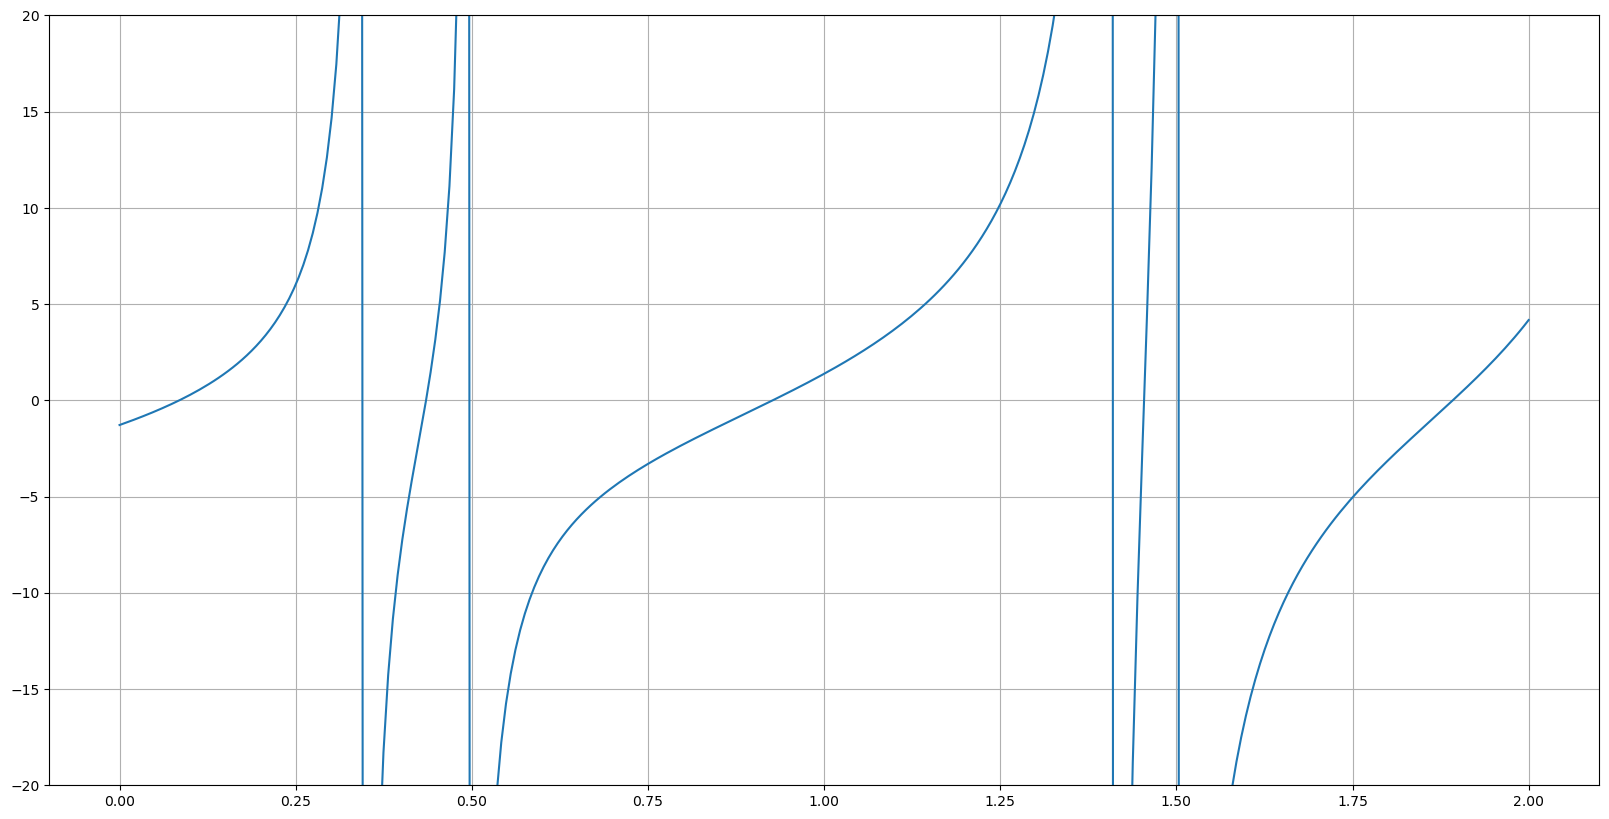

In [ ]:
#graph zeta from q=0 to q=3

q = np.linspace(0,2,300)
zeta_plot = np.array([])
for q_i in q:
    zeta_plot = np.append(zeta_plot, zeta(q_i, 1000, 0.1, np.array([1,1,0]), 300*3.6/(197)))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q, zeta_plot)
plt.ylim(-20,20)
plt.grid()

plt.show()


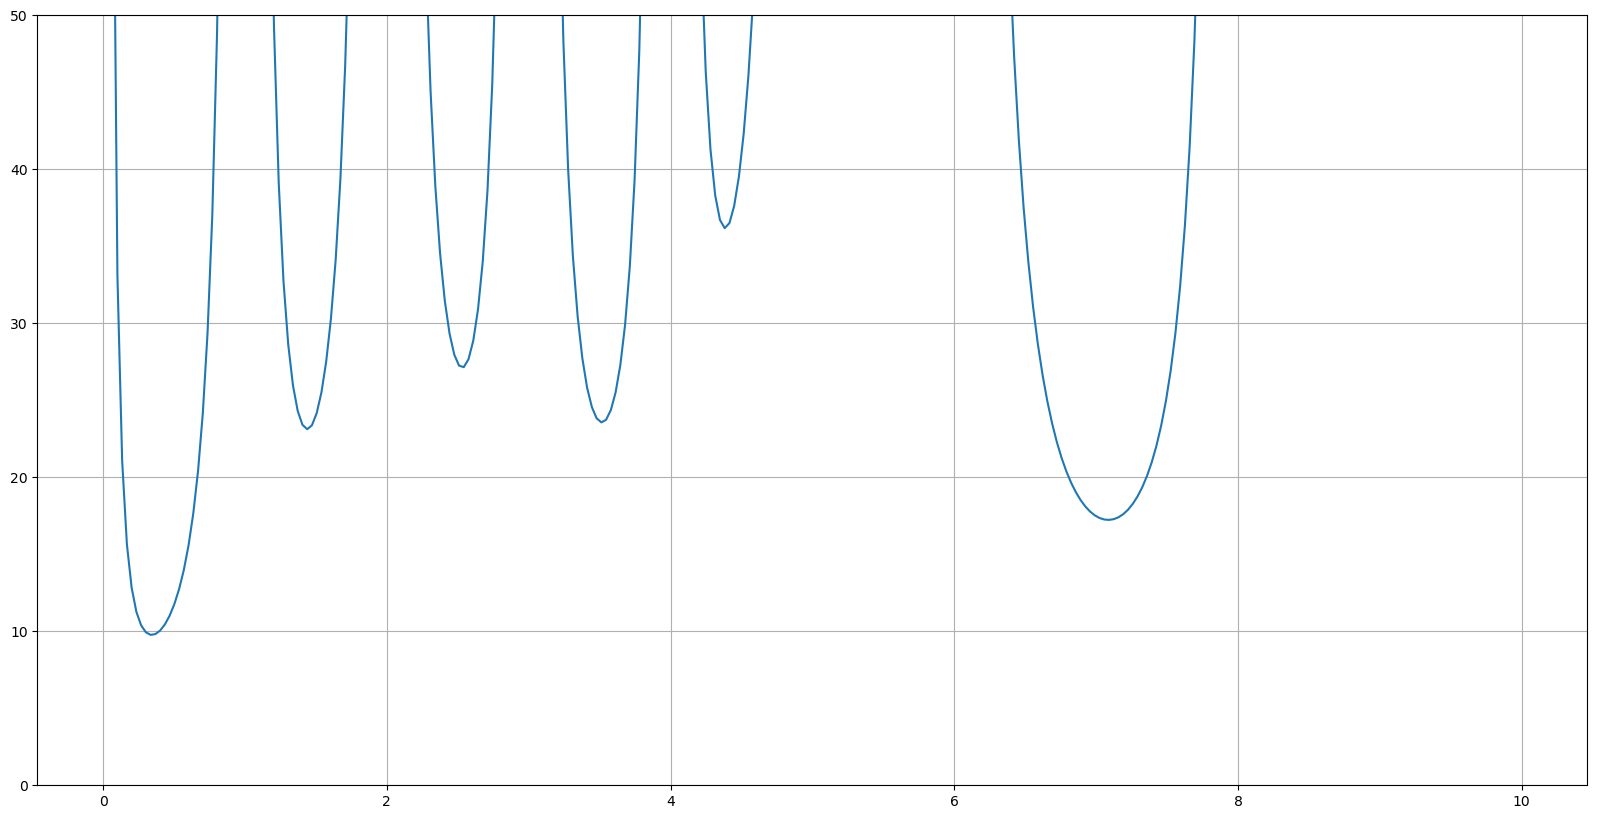

In [ ]:
##compare derivative() to derivative_LT()

q = np.linspace(0,10,300)
derivative_plot = np.array([])
for q_i in q:
    derivative_plot = np.append(derivative_plot, derivative(q_i, 1000, 1))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot)
plt.ylim(-0,50)
plt.grid()

plt.show()


/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:39: RuntimeWarning: divide by zero encountered in divide
  original = omega_r_star/omega_r*np.exp(-alpha*(r_star_sq-q_2_star))/(r_star_sq-q_2_star)
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:42: RuntimeWarning: divide by zero encountered in divide
  term_1= original*(alpha+1/(r_star_sq-q_2_star))
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:43: RuntimeWarning: invalid value encountered in divide
  term_2 = (2*beta)/(m_tilde_sq+4*x) * 1/omega_r \
/Users/ericrechberger/Library/CloudStorage/OneDrive-UniversityofEdinburgh/MPhys project/Code/MPhys-Code/derivative.py:46: RuntimeWarning: divide by zero encountered in divide
  *(1- 2*omega_r_star**2*(alpha+1/(r_star_sq-x)))
/Users/ericrechberger/Library/CloudStorage/OneDrive-Univers

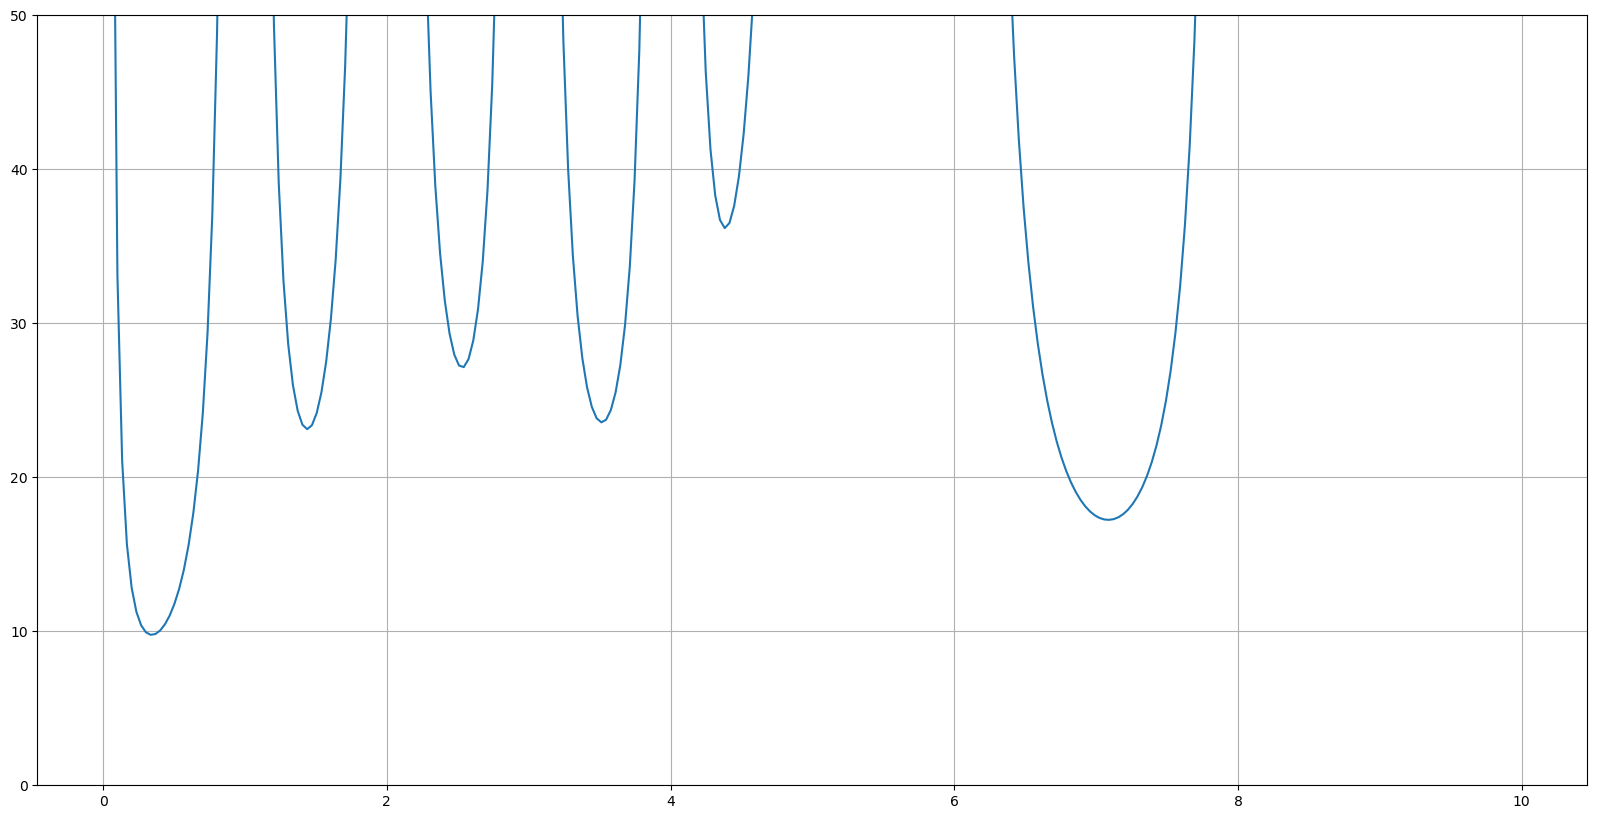

In [ ]:
q = np.linspace(0,10,300)
derivative_plot1 = np.array([])
for q_i in q:
    derivative_plot1 = np.append(derivative_plot1, derivative_LT(q_i, 1000,np.array([0,0,0]),0.000001))


plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot1)
plt.ylim(-0,50)
plt.grid()

plt.show()

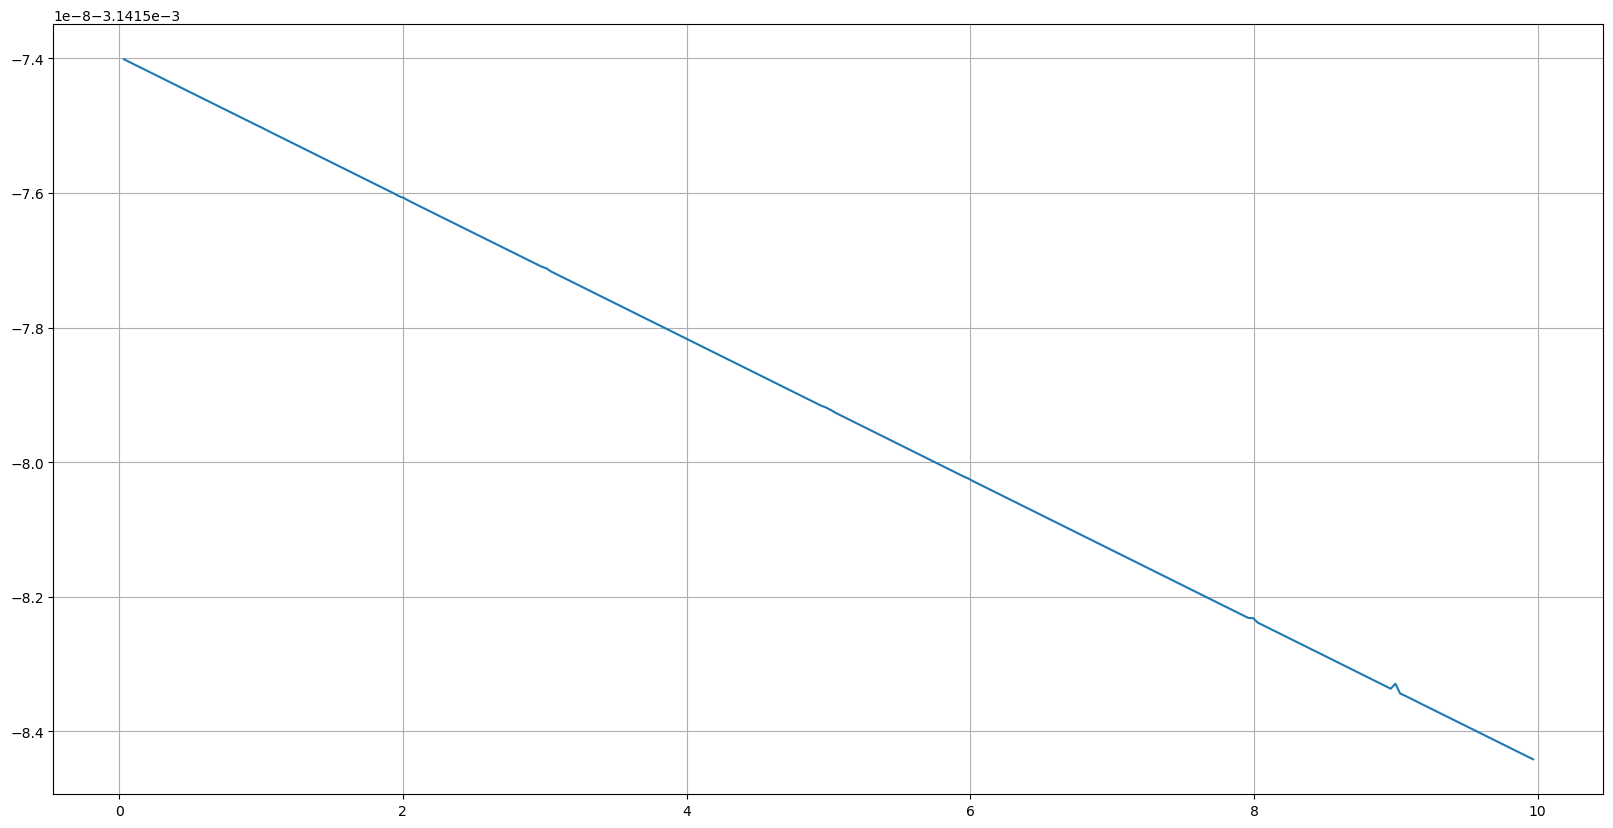

In [ ]:
#plot difference between derivative and derivative_LT

plt.figure(figsize=(20,10))
plt.plot(q, derivative_plot-derivative_plot1)

plt.grid()


In [ ]:
from zeta import *

2.465285621179456e-14


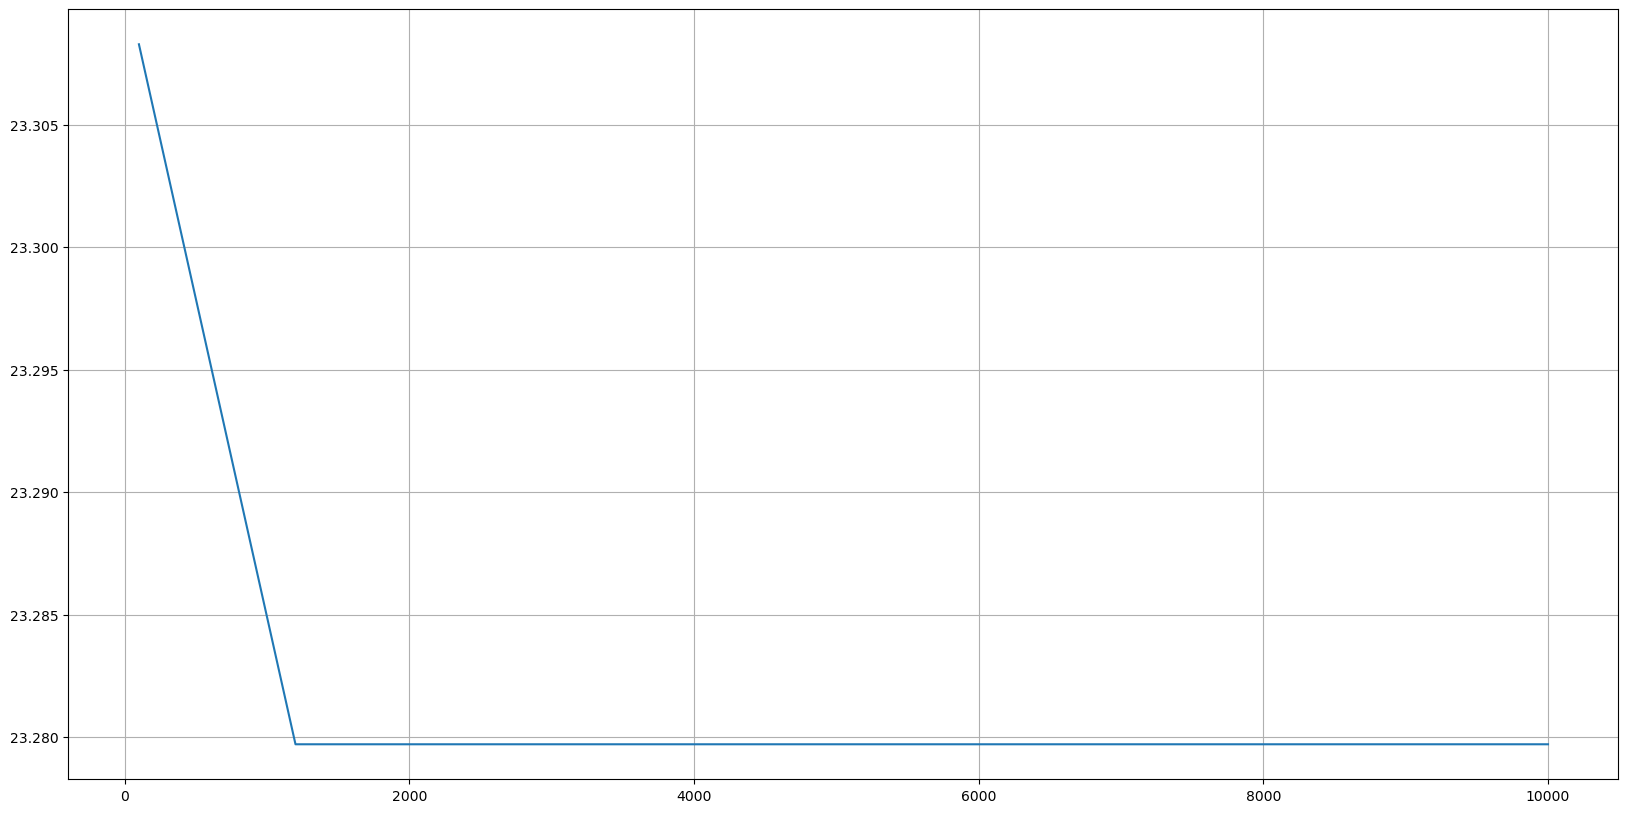

In [ ]:

alpha = 0.2


#plot convergence of first_deriv vs xi range 0 to 1000 

xi = np.linspace(100,10000,10)
first_deriv_plot = np.array([])
for xi_i in xi:
    first_deriv_plot = np.append(first_deriv_plot, first_deriv(x_0, d, xi_i,alpha))

plt.figure(figsize=(20,10))
plt.plot(xi, first_deriv_plot)
plt.grid()


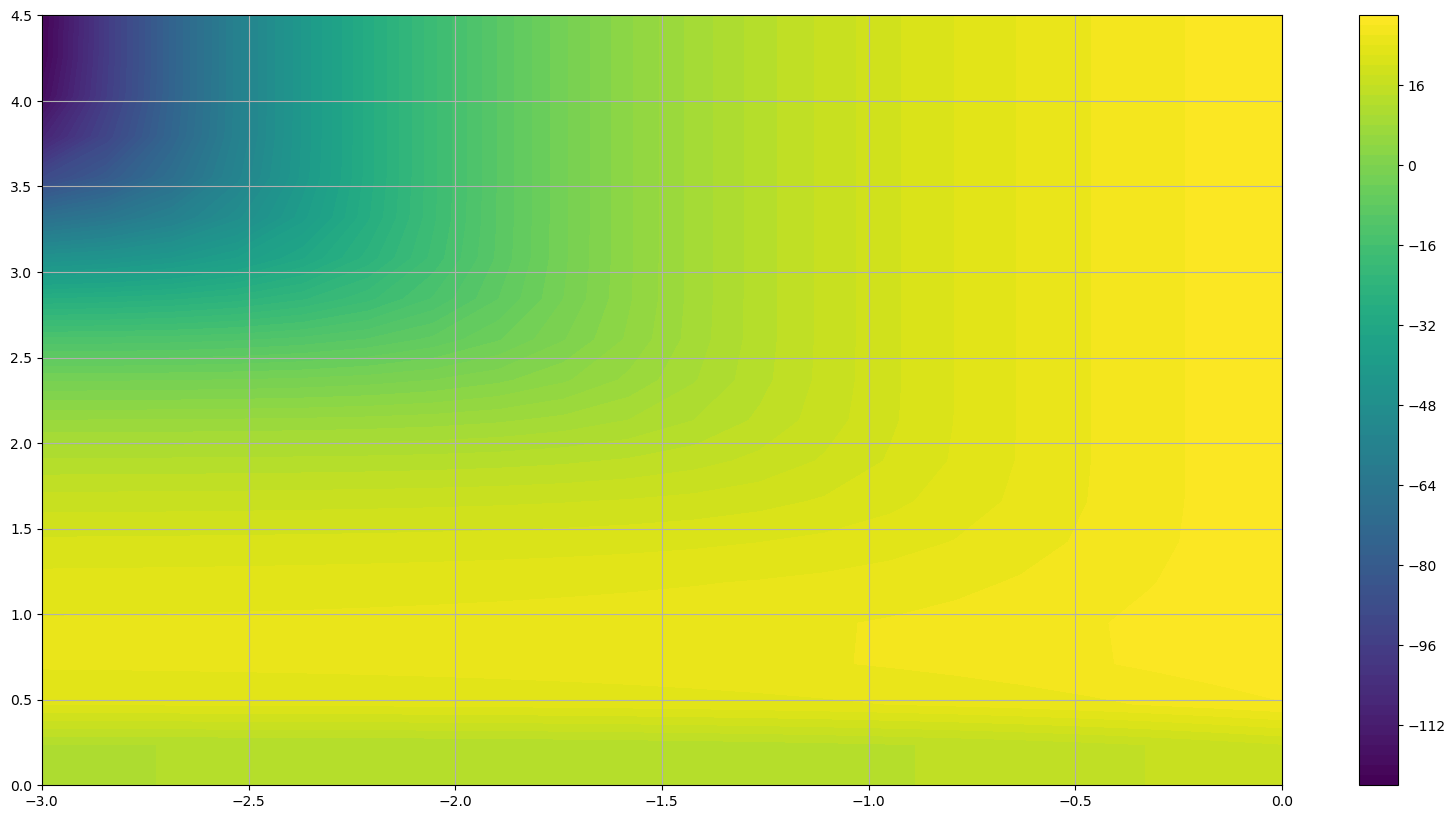

In [ ]:
#make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000


a = np.linspace(0,3,20)
k = np.linspace(0,4.5,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = first_deriv(x_0, d, mesh2[i][j],mesh1[i][j])

mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)



plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 100)
plt.colorbar()
plt.grid()


In [ ]:
x_0

0.045696721160940486

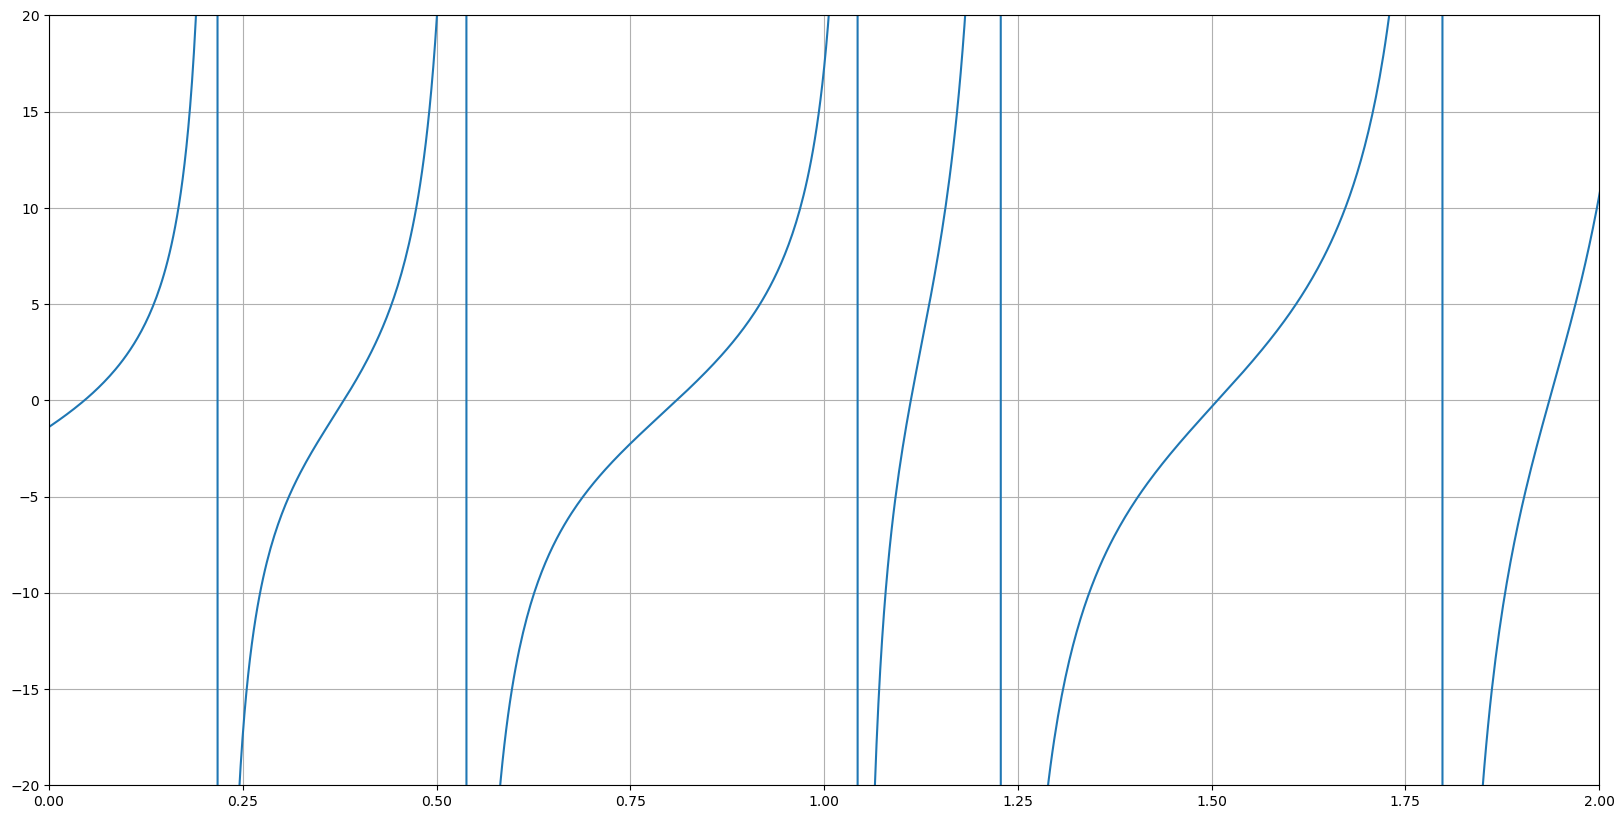

In [ ]:
#plot q_2_plot vs zeta_plot

plt.figure(figsize=(20,10))
plt.plot(q_2_plot, zeta_plot)
plt.ylim(-20,20)
plt.xlim(0,2)
plt.grid()



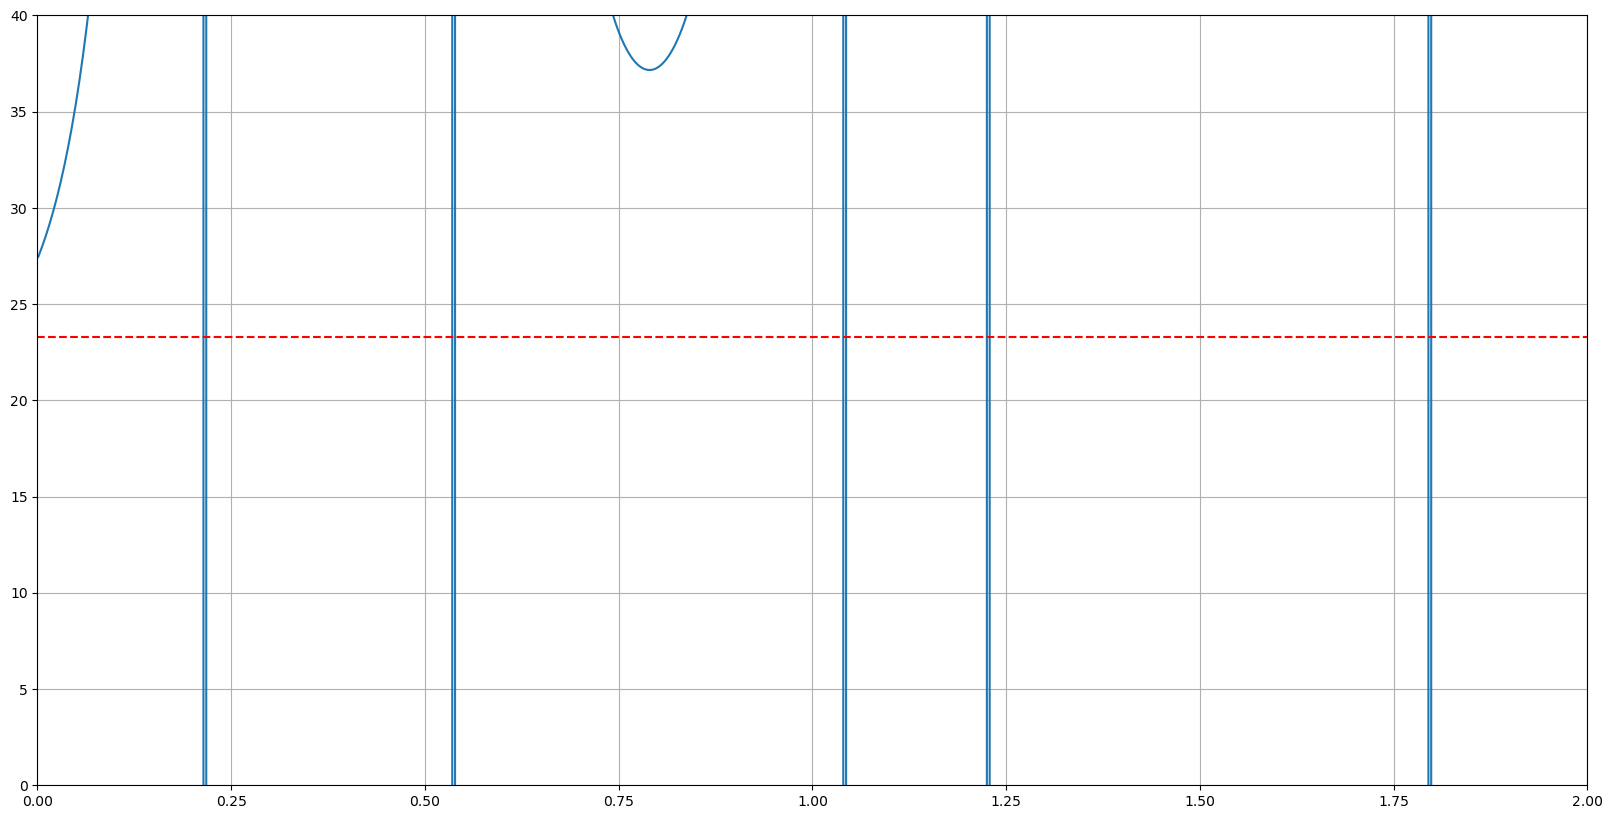

In [ ]:
dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx


plt.figure(figsize=(20,10))
plt.plot(q_2_plot[:-1], dy_dx)
plt.ylim(0,40)
plt.xlim(0,2)
plt.grid()

# Plot a horizontal line at y = 12.3
plt.axhline(y=first_deriv_plot[-1], color='red', linestyle='--')

plt.show()



In [ ]:
x_0

0.6439411864814153

In [276]:


def zeta_2(q_2_star=1.5, d = np.array([0,0,0]), cutoff= 9 ,  alpha = 0.1):
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*q_2_star + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    r_parallel_sq = 1/gamma**2*(r_parallel+ 1/2 * d_scalar)**2 
    r_sq = r_parallel_sq+ r_perp_sq
    D = r_sq-q_2_star
    terms = np.exp(-alpha*D)/(D)

    sum_terms = np.sum(terms)

    pv = 2.0*(np.pi**2)*np.sqrt(q_2_star)\
        * erfi(np.sqrt(alpha*q_2_star))\
        - 2.0*np.exp(alpha*q_2_star)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    
    return( sum_terms + pv*gamma)/np.sqrt(4*np.pi) 


In [277]:
x = 0.5

print(zeta_2(x, d, 1000, 0.1))
print(zeta(x, 100, 0.1, d, 4))


19.694937599914336
19.340810974065214


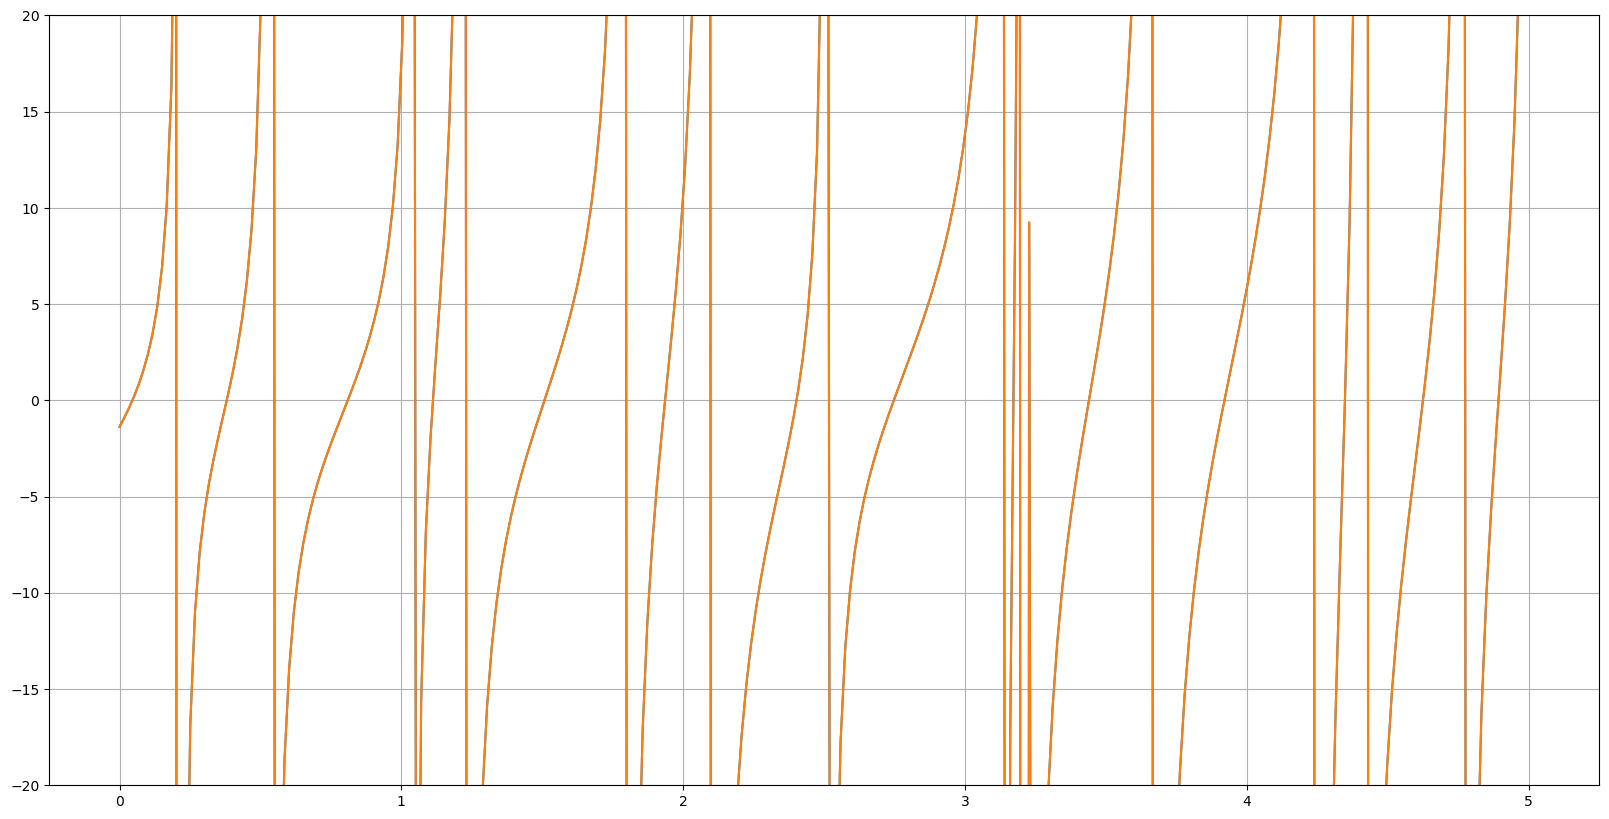

In [279]:
#plot zeta_2 for q 0 to 5, alpha =.1 and d = [0,0,0]


d = np.array([2,1,0])


q = np.linspace(0,5,300)
zeta_plot = np.array([])
for q_i in q:
    zeta_plot = np.append(zeta_plot, zeta_2(q_i, d, 3000, 0.1))


#plot zeta for q 0 to 5, alpha =.1 and d = [0,0,0]

q = np.linspace(0,5,300)
zeta_plot1 = np.array([])
for q_i in q:
    zeta_plot1 = np.append(zeta_plot1, zeta(q_i, 3000, 0.1, d, 4))




plt.figure(figsize=(20,10))
plt.plot(q, zeta_plot)
plt.plot(q, zeta_plot1)
plt.ylim(-20,20)
plt.grid()


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_28094/2366578485.py:4: RuntimeWarning: invalid value encountered in subtract
  plt.plot(q, zeta_plot-zeta_plot1)


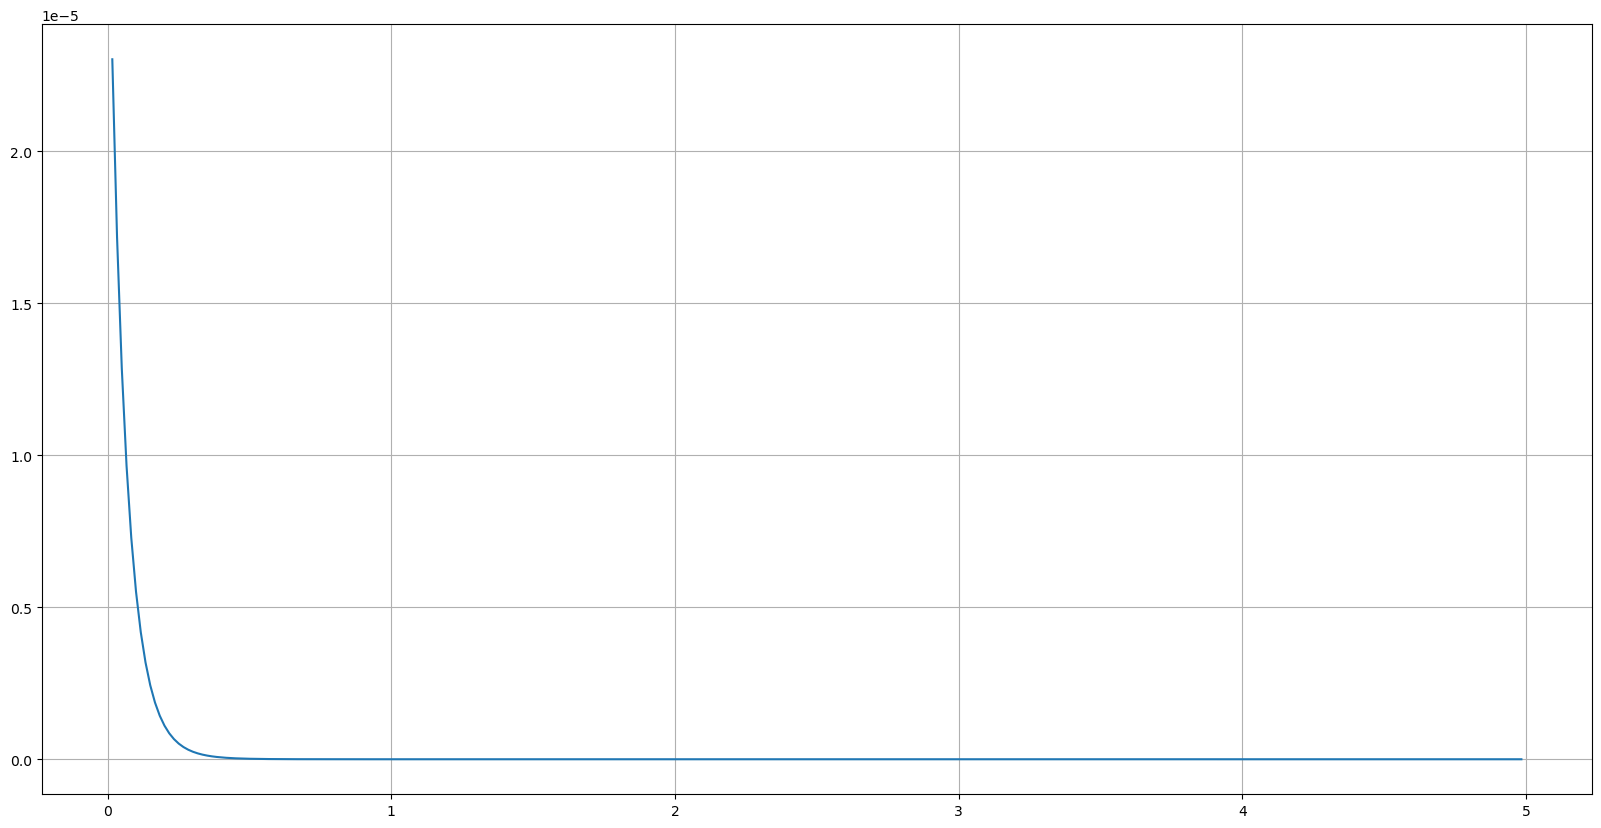

In [135]:
#plot difference between zeta and zeta_2

plt.figure(figsize=(20,10))
plt.plot(q, zeta_plot-zeta_plot1)

plt.grid()


In [113]:
from derivative_rg import *
from derivative_KSS import *


In [114]:
deriv_rg(0.7, np.array([3,0,0]), 100, 0.1)

206.80136210339865

In [115]:
derivative_LT(0.7, 100, np.array([3,0,0]), 0.1)

204.36781991381238

In [116]:
0.01831563888873418*204.36781991381238

3.7431271900192455

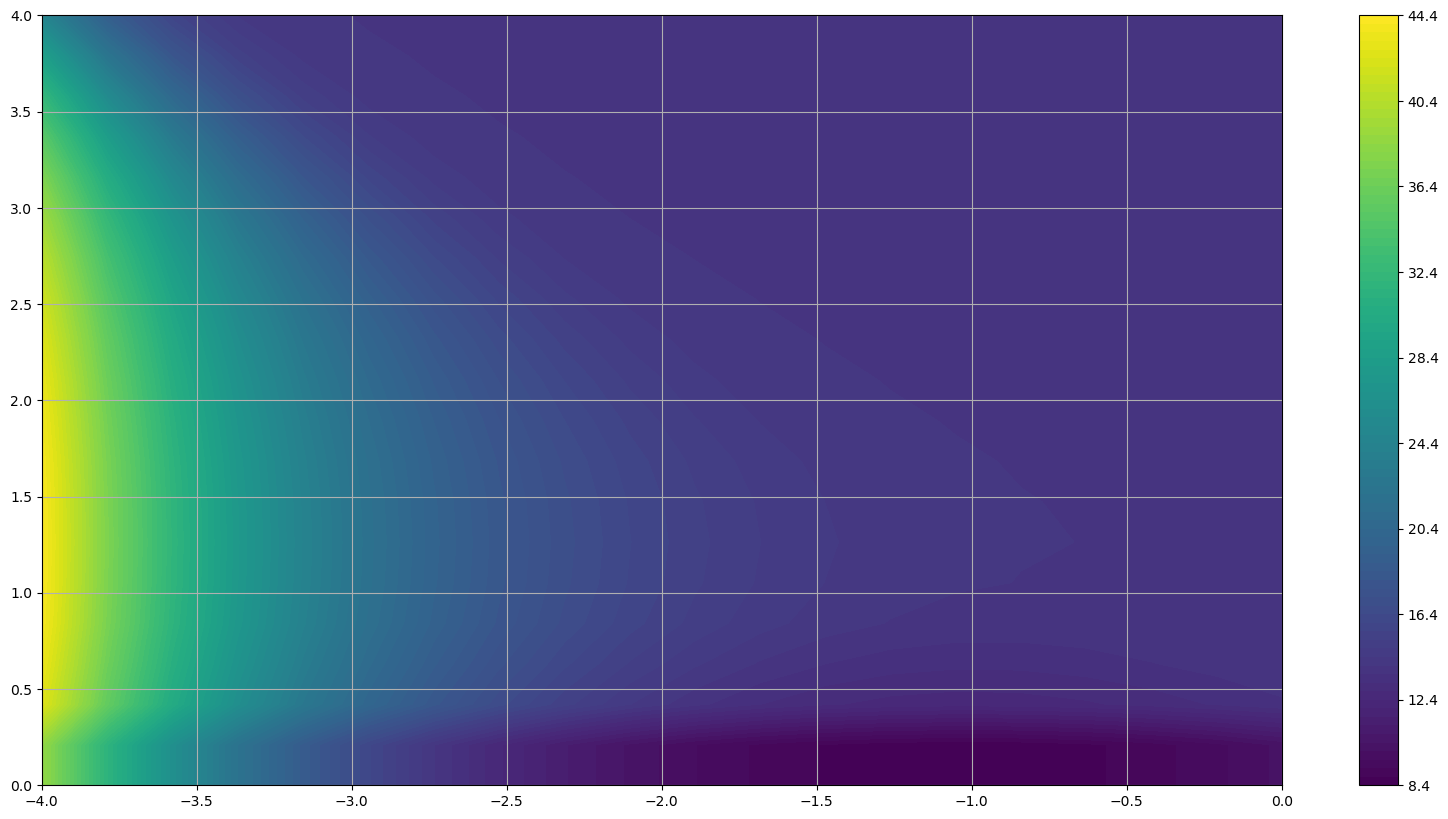

In [18]:
#make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000



a = np.linspace(0,4,20)
k = np.linspace(0,4,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = deriv_rg(x_0, d, mesh2[i][j],mesh1[i][j])

mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)



plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 100)
plt.colorbar()
plt.grid()


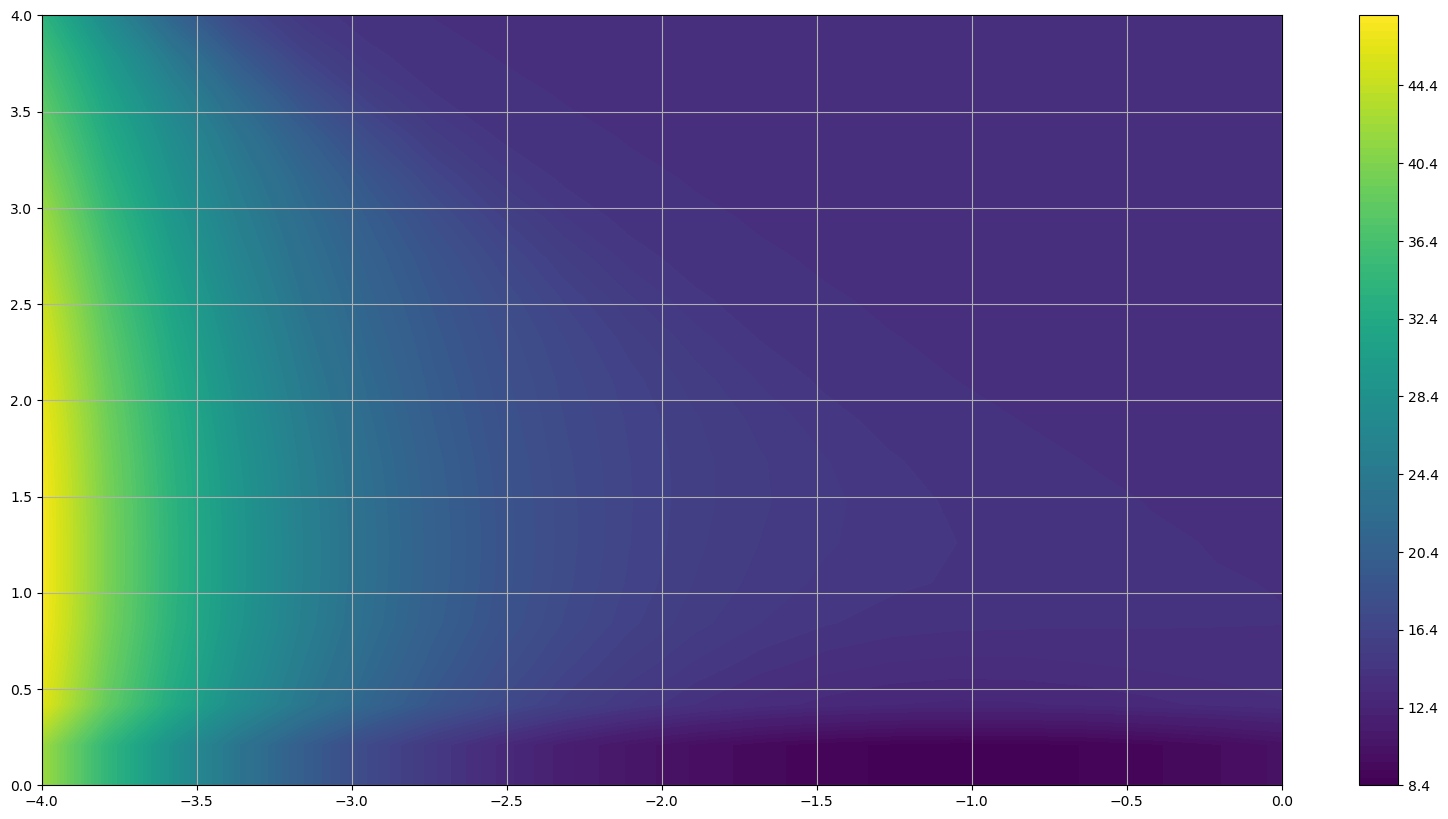

In [19]:
#make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000



a = np.linspace(0,4,20)
k = np.linspace(0,4,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = derivative_LT(x_0,  mesh2[i][j],d,mesh1[i][j])

mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)



plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 100)
plt.colorbar()
plt.grid()


In [20]:
np.exp(-4)

0.01831563888873418

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_45182/3727044756.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x), (gamma))


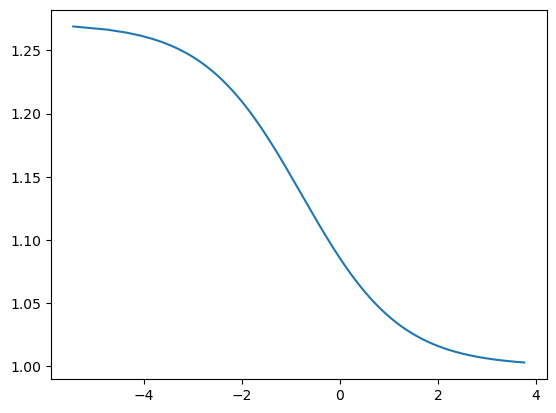

In [43]:
x = np.linspace(0,43,10000)

s = 4*x + (4/np.pi)**2

gamma = np.sqrt(1+1/s)

plt.plot(np.log(x), (gamma))

In [187]:


####checking if rparallel *d is conserved



def deriv_rg1(q_2_star=1.5, d = np.array([0,0,0]), cutoff= 9 ,  alpha = 0.1):
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*q_2_star + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    r_parallel_sq = r_parallel**2
    r_parallel_sq = 1/gamma**2*(r_parallel+ 1/2 * d_scalar)**2 
    r_sq = r_parallel_sq+ r_perp_sq
    D = r_sq-q_2_star



    terms = np.exp(-alpha*D)/(D)*(r_parallel**2-1/4*d_scalar**2)#(r_parallel-d_scalar/2)*(r_parallel+d_scalar/2)

    sum_terms = np.sum(terms)/np.sqrt(4*np.pi)


    return( sum_terms )

In [188]:
deriv_rg1(1.9, np.array([1,0,0]), 10000 ,  0.1)

39.05720845282805

In [302]:
##graph G(r_par^2)




####checking if rparallel *d is conserved



def g_par(q_2_star=1.5, d = np.array([0,0,0]), cutoff= 9 ,  alpha = 0.1):
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*q_2_star + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*q_2_star + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2

    r_parallel = 1/gamma*(r_parallel+ 1/2 * d_scalar)
    r_parallel_sq = r_parallel**2
    r_sq = r_parallel_sq+ r_perp_sq
    D = r_sq-q_2_star



    terms = np.exp(-alpha*D)/(D)*r_parallel_sq#(r_parallel-d_scalar/2)*(r_parallel+d_scalar/2)

    terms_2 = np.exp(-alpha*D)/(D)#*r_perp_sq#

    sum_terms = np.sum(terms)/np.sqrt(4*np.pi)
    sum_terms_2 = np.sum(terms_2)/np.sqrt(4*np.pi)


    return( sum_terms, sum_terms_2 )

In [303]:
g_par(1.9, np.array([2,0,0]), 10000 ,  0.1)

(21.94987755630302, 9.350296025225903)

(0.0, 2.0)

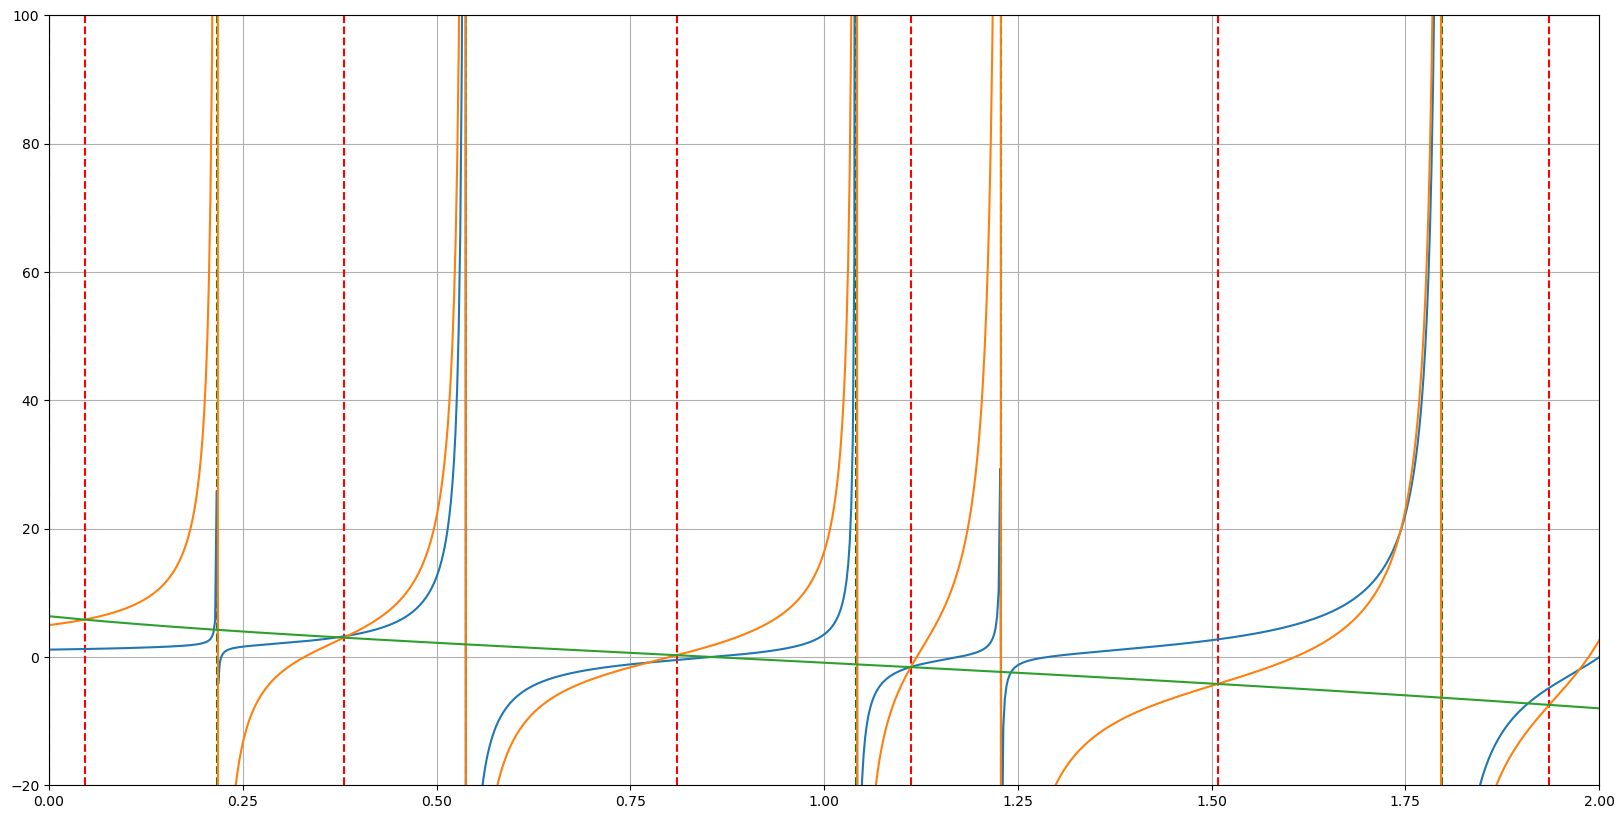

In [342]:
#plot g_par for q 0 to 5, alpha =.1 and d = [0,0,0] 

q = np.linspace(0,2,1000)
g_par_plot = np.array([])
zeta_plot = np.array([])
pv_plot = np.array([])
for q_i in q:
    gamma = 1/np.sqrt(1+np.linalg.norm(d)**2/(4*q_i+(4/np.pi)**2))
    g_par_1, zeta_1 = g_par(q_i,d, 1000, 1)
    pv_plot = np.append(pv_plot, -1/gamma*zeta_pv(q_i,1))
    g_par_plot = np.append(g_par_plot, g_par_1)
    zeta_plot = np.append(zeta_plot, zeta_1)


#now plot
    
plt.figure(figsize=(20,10))
for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')

#draw asymptotes
for asymptote in asymototes:
    plt.axvline(x=asymptote, color='green', linestyle='--')

plt.plot(q, g_par_plot)
plt.plot(q, zeta_plot)
plt.plot(q, pv_plot)    
plt.ylim(-20,100)
plt.grid()

#mark roots as vertical lines on plot


plt.xlim(q[0],q[-1])




(3.0, 5.0)

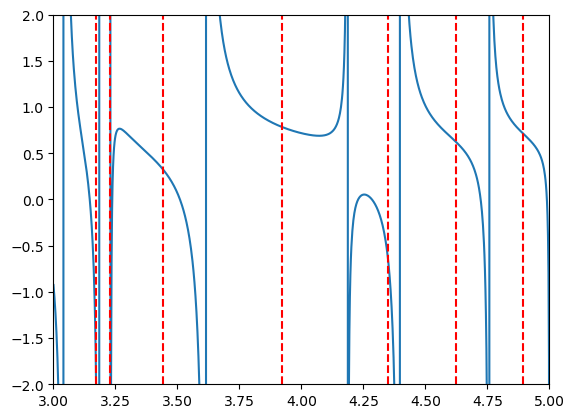

In [322]:
plt.plot(q, g_par_plot/zeta_plot)
#plot zeros
for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')
plt.ylim(-2,2)
plt.xlim(q[0],q[-1])


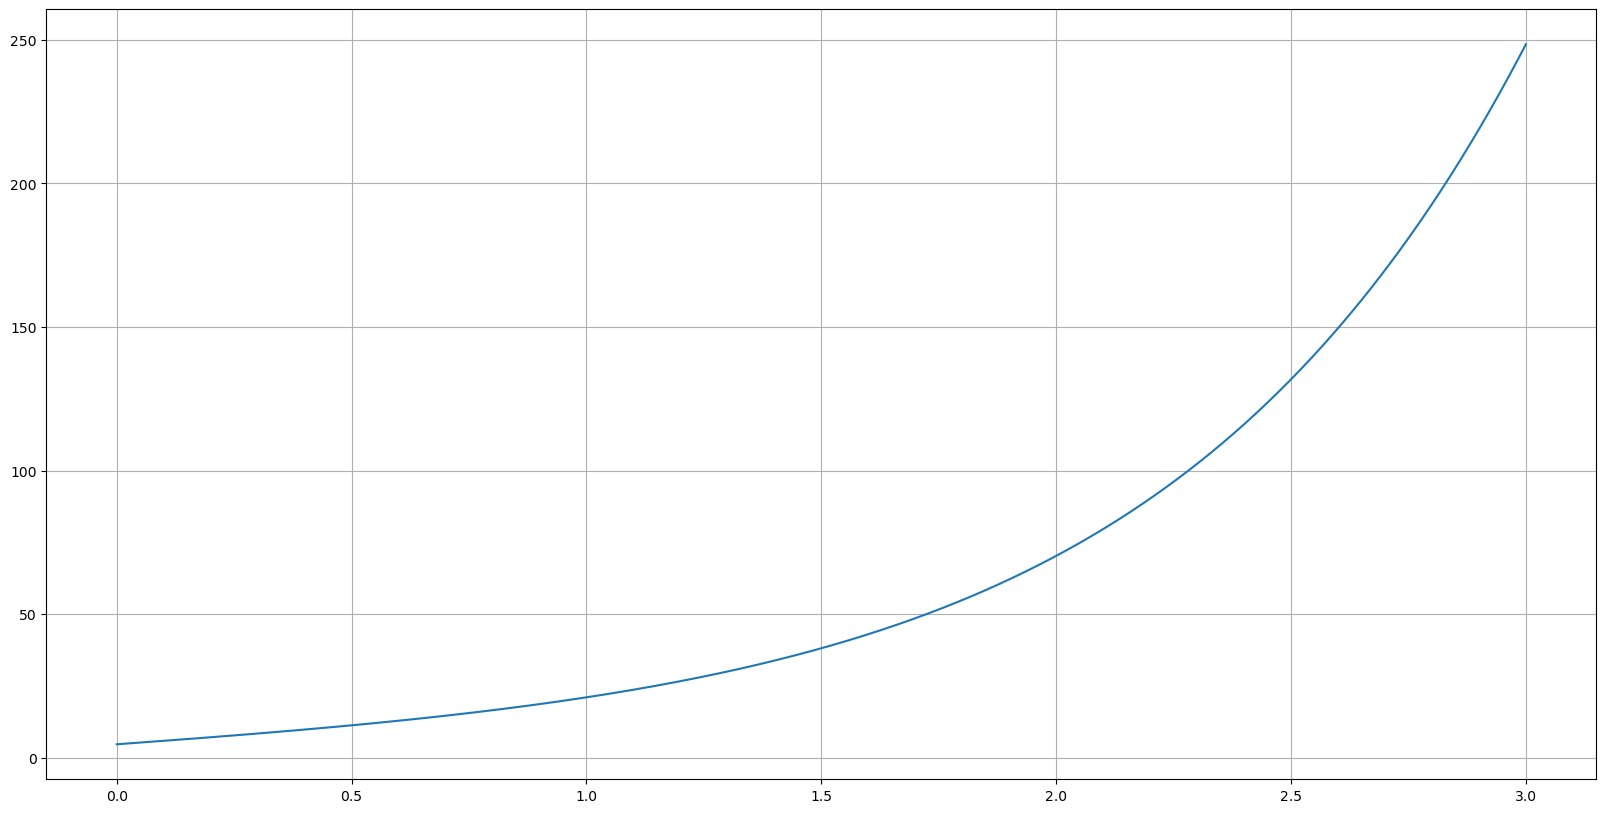

In [252]:
def function(x, alpha):
    gamma = np.sqrt(1+1/(4*x+(4/np.pi)**2))

    T1 = -np.pi/2*np.sqrt(x**3)*erfi(np.sqrt(alpha*x))
    T2 = np.exp(alpha*x)/2*np.sqrt(np.pi/alpha**3)
    T3 = np.exp(alpha*x)*x*np.sqrt(np.pi/alpha)

    return (T1+T2+T3)*4*np.pi/3


function(0.5, 0.1)


#plot function for x 0 to 5, alpha =.1


x = np.linspace(0,3,1000)
function_plot = np.array([])
for x_i in x:
    function_plot = np.append(function_plot, function(x_i, 1))

#plot
    
plt.figure(figsize=(20,10))
plt.plot(x, function_plot)
#plt.ylim(-20,100)
plt.grid()





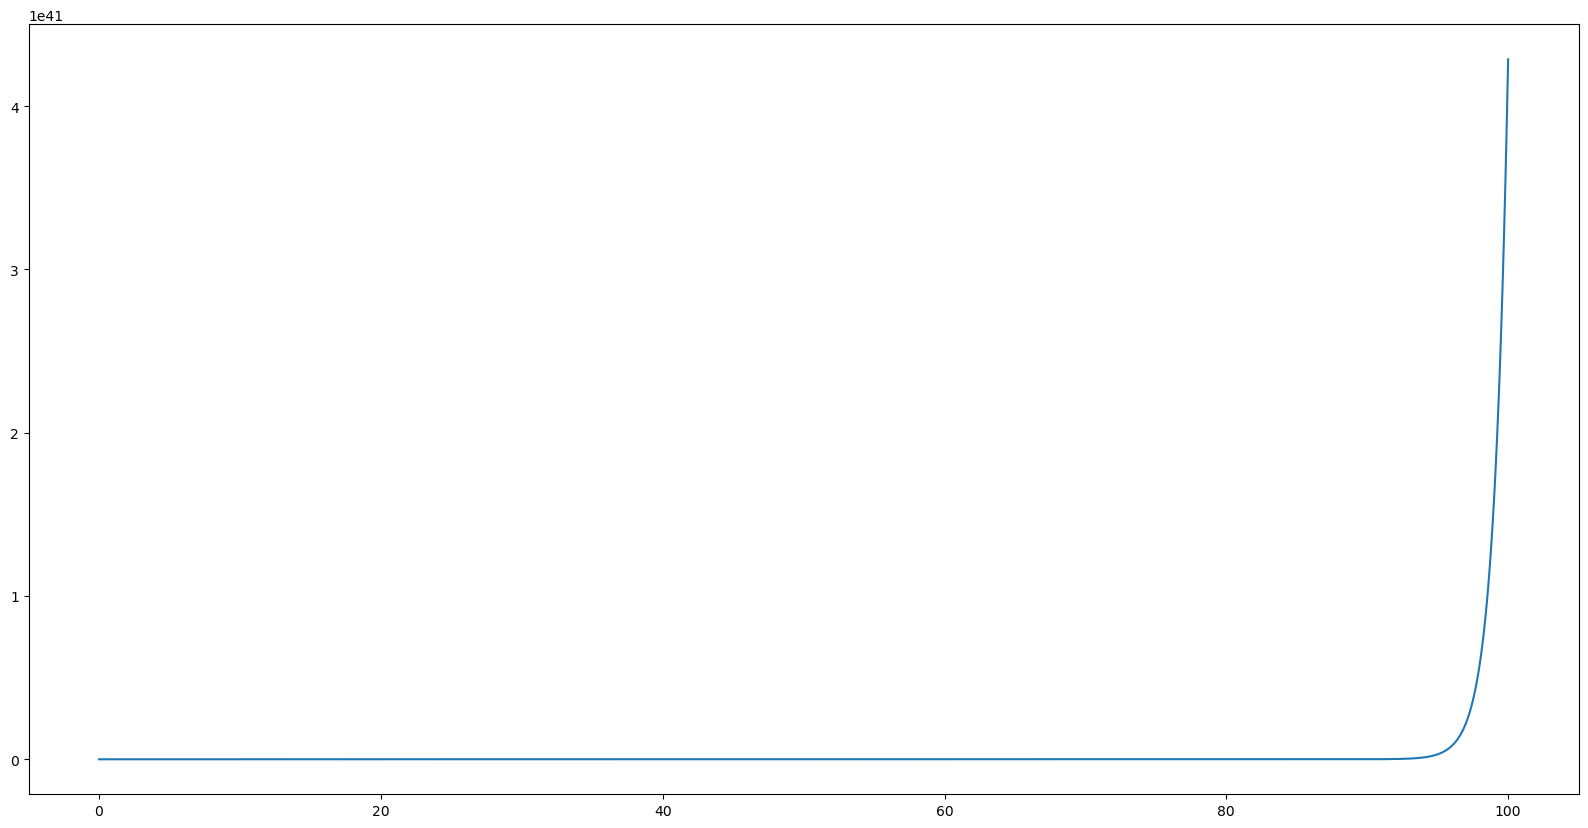

In [237]:
#plot pv

pv_derivative_LT(0.5, 0.1)

#plot zeta_pv for x 0 to 5, alpha =.1

x = np.linspace(0,100,1000)
zeta_pv_plot = np.array([])
for x_i in x:
    zeta_pv_plot = np.append(zeta_pv_plot, zeta_pv(x_i, 1))

#plot

plt.figure(figsize=(20,10))
plt.plot(x, zeta_pv_plot)
#plt.ylim(-20,100)


In [430]:
def g(a, b, x ,d, alpha, cutoff):
    
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*x + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    r_parallel_star = 1/gamma*(r_parallel+ 1/2 * d_scalar)
    r_parallel_star_sq = r_parallel_star**2
    r_sq = r_parallel_star_sq+ r_perp_sq
    D = r_sq-x


    terms_2 = np.exp(-alpha*D)/(D)**(a+1)*r_parallel**(2*b)

    return np.sum(terms_2)/np.sqrt(4*np.pi)

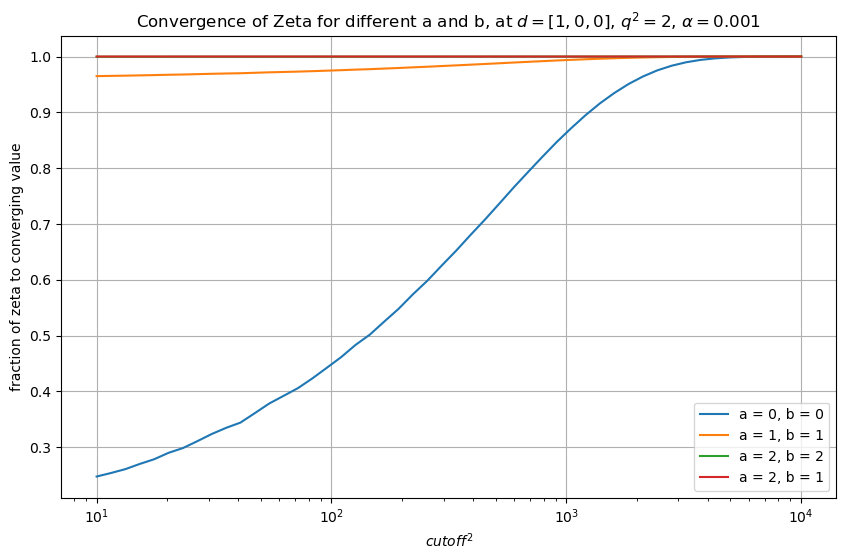

In [493]:
cutoffs = np.logspace(1,4,50)
yvals1 = np.zeros_like(cutoffs)
yvals2 = np.zeros_like(cutoffs)
yvals3 = np.zeros_like(cutoffs)
yvals4 = np.zeros_like(cutoffs)
yvals5 = np.zeros_like(cutoffs)
yvals6 = np.zeros_like(cutoffs)
yvals7 = np.zeros_like(cutoffs)

x = 2
alpha = 0.001

inputs = np.array([(3,0), (1,1), (2,2), (2,1), (3,3), (3,2), (3,1)])

for i in range(len(cutoffs)):
   yvals1[i] = g(inputs[0,0], inputs[0,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals2[i] = g(inputs[1,0], inputs[1,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals3[i] = g(inputs[2,0], inputs[2,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals4[i] = g(inputs[3,0], inputs[3,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals5[i] = g(inputs[4,0], inputs[4,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals6[i] = g(inputs[5,0], inputs[5,1], x ,[1,0,0], alpha, cutoffs[i])
   yvals7[i] = g(inputs[6,0], inputs[6,1], x ,[1,0,0], alpha, cutoffs[i])





plt.figure(figsize=(10,6))
plt.semilogx(cutoffs, yvals1/yvals1[-1], label = "a = {}, b = {}".format(inputs[0,0], inputs[0,1]))
plt.semilogx(cutoffs, yvals2/yvals2[-1], label = "a = {}, b = {}".format(inputs[1,0], inputs[1,1]))
plt.semilogx(cutoffs, yvals3/yvals3[-1], label = "a = {}, b = {}".format(inputs[2,0], inputs[2,1]))
plt.semilogx(cutoffs, yvals4/yvals4[-1], label = "a = {}, b = {}".format(inputs[3,0], inputs[3,1]))
plt.semilogx(cutoffs, yvals5/yvals5[-1], label = "a = {}, b = {}".format(inputs[4,0], inputs[4,1]))
plt.semilogx(cutoffs, yvals6/yvals6[-1], label = "a = {}, b = {}".format(inputs[5,0], inputs[5,1]))
plt.semilogx(cutoffs, yvals7/yvals7[-1], label = "a = {}, b = {}".format(inputs[6,0], inputs[6,1]))

             
plt.xlabel("$cutoff^2$")
plt.ylabel("fraction of zeta to converging value")
plt.title("Convergence of Zeta for different a and b, at $d = [1,0,0]$, $q^2 = 2$, $\\alpha = 0.001$")
plt.legend()
plt.grid()

plt.show()

In [6]:
x_0

0.0

In [7]:
g(0,0, roots[1], d, 1, 100)

9.26970934349094

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/1426642200.py:48: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*r_parallel**(2*b)


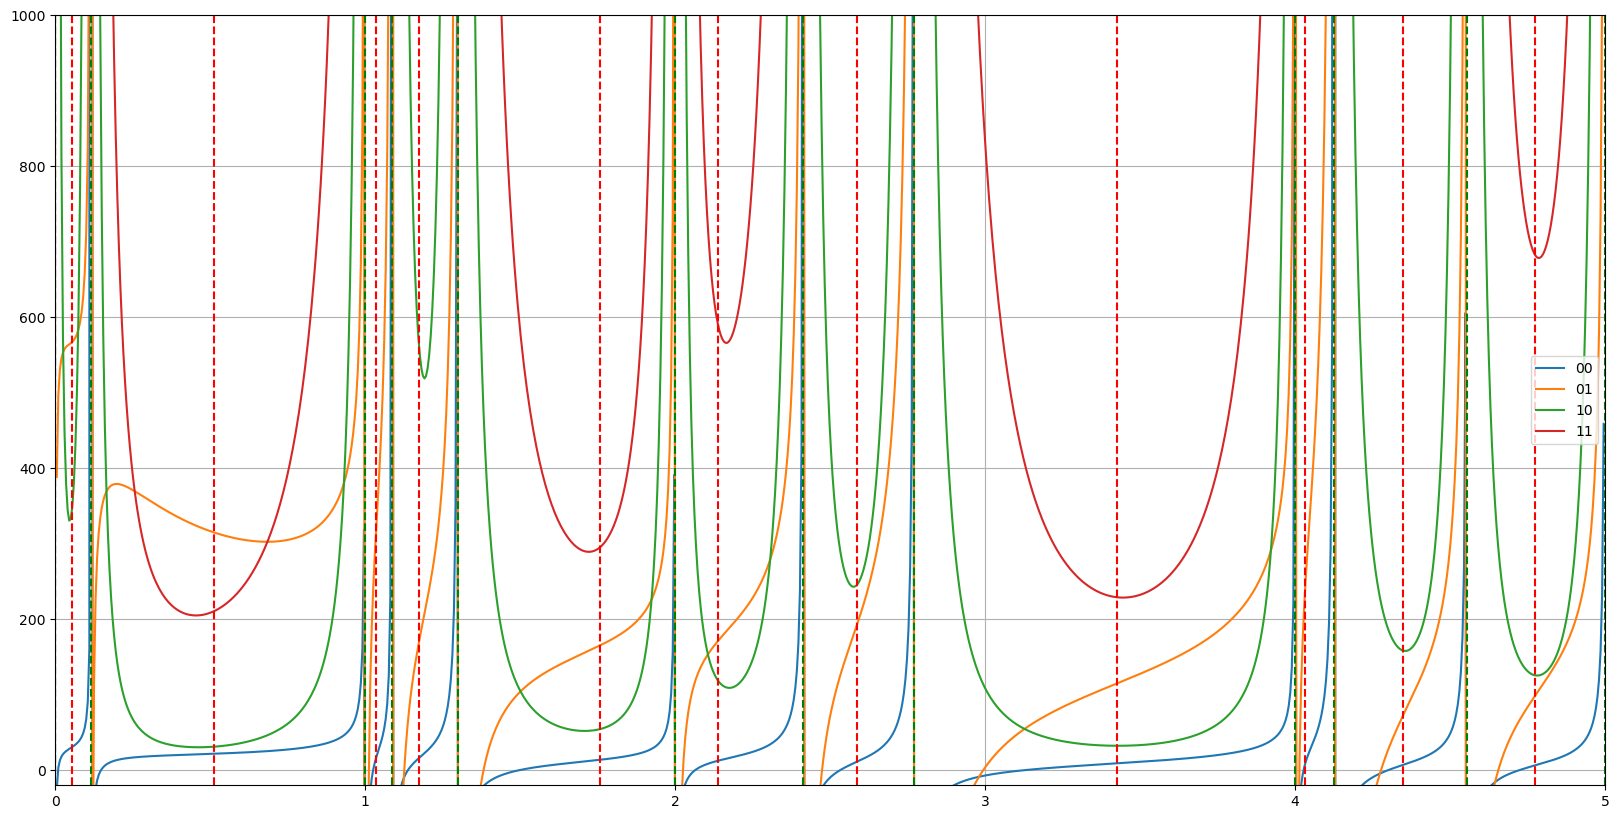

In [8]:

xs = np.linspace(0,5,1000)
plt.figure(figsize=(20,10))

for a in range(0,2):
    for b in range(0,2):
        
        #evaluate g for each a and b
        g_plot = np.array([])
        for x_i in xs:
            g_plot = np.append(g_plot, g(a,b, x_i,d, 0.1, 200))
        
        plt.plot(xs, g_plot, label = str(a) + str(b))


#plot asymptotes
        
for asymptote in asymototes:
    plt.axvline(x=asymptote, color='green', linestyle='--')

#plot zeros
    
for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')




plt.legend()
plt.xlim(xs[0], xs[-1])
plt.ylim(-20,1000)
plt.grid()


In [61]:
### computing the second derivative of zeta

def sum_part_second(d, x, alpha, cutoff):

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 +s)

    beta = d_scalar/E

    A = 1+beta**4

    if d_scalar:
        B = -4/d_scalar**2*beta**4
        A_dx = -8/d_scalar**2*beta**6
        B_dx = 32/d_scalar**4*beta**6
    else: 
        B = 0
        A_dx = 0
        B_dx = 0


    Coefficient_matrix = np.array([[A_dx*alpha + A**2*alpha**2   ,  2*A*B*alpha**2 + B_dx * alpha   ,  B**2*alpha**2   ],
                                   [A_dx + 2*A**2*alpha,            B_dx + 4*A*B*alpha,                2*B**2*alpha    ],
                                   [ 2*A**2 ,                       4*A*B,                             2*B**2          ]])
                                
    gs = np.zeros_like(Coefficient_matrix)


    for i in range(len(Coefficient_matrix)):
        for j in range(len(Coefficient_matrix[0])):
            gs[i][j] = g(i,j, x, d, alpha, cutoff)


    #print(Coefficient_matrix)
    #print(gs)
    #print(gs*Coefficient_matrix)


    return np.sum(gs*Coefficient_matrix)




def pv_part_second(d, x, alpha):
    ML = 4
    d = np.linalg.norm(d)
    s = 4*x + (ML/np.pi)**2
    gamma  = np.sqrt(1  + d**2/s)
    gamma_dx = -2 * d**2/(gamma*s**2)
    gamma_dx2 = 4*d**4/(gamma**3*s**4) +24* d**2/(gamma*s**3)
    

    pv = -2.0*(np.pi**2)*np.sqrt(x)\
        * erfi(np.sqrt(alpha*x))\
        + 2.0*np.exp(alpha*x)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
    pv_dx2 = np.pi**2/2/np.sqrt(x**3)*erfi(np.sqrt(alpha*x)) - np.sqrt(np.pi**3*alpha)/x * np.exp(alpha*x)

    all = gamma*pv_dx2 + 2*gamma_dx*pv_dx + gamma_dx2*pv

    print(all)
    return all/np.sqrt(4*np.pi)


def second_deriv(d, x, alpha, cutoff):
    return sum_part_second(d, x, alpha, cutoff) - pv_part_second(d, x, alpha)

In [53]:
def beta_fx(d, x):
    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 +s)

    beta = d_scalar/E

    A = 1+beta**4

    if d_scalar:
        B = -4/d_scalar**2*beta**4
        A_dx = -8/d_scalar**2*beta**6
        B_dx = 32/d_scalar**4*beta**6
    else: 
        B = 0
        A_dx = 0
        B_dx = 0

    return A,A_dx , B, B_dx




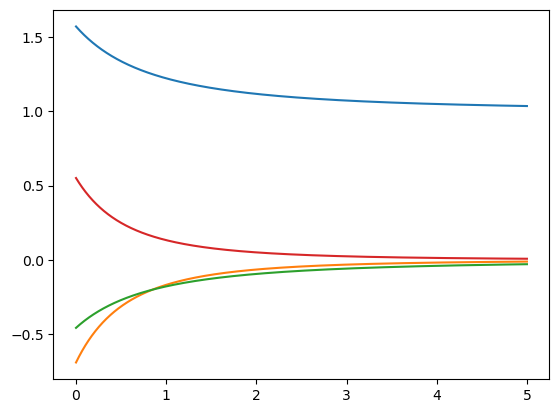

In [54]:
x = np.linspace(0,5,1000)

plt.plot(x,[beta_fx(np.array([2,1,0]), el) for el in x ])

In [63]:
second_deriv(d, roots[2], 0.1, 1000)

    

134.23804394061364


154.28309621588966

In [56]:
second_deriv(d, roots[0], 0.1, 1000)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/1426642200.py:48: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*r_parallel**(2*b)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/739367461.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/739367461.py:61: RuntimeWarning: invalid value encountered in scalar multiply
  pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/739367461.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  pv_dx2 = np.pi**2/2/np.sqrt(x**3)*erfi(np.sqrt(alpha*x)) - np.sqrt(np.pi**3*alpha)/x * np.exp(alpha*x)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/739367461.py:62: RuntimeWarning: invalid value encountered in scalar multiply
  pv_dx2 = np.pi*

nan

In [57]:
print(g(2, 0, roots[1], d, 0.1, 1000)*2)

5991.514467818272


(0.0, 4.0)

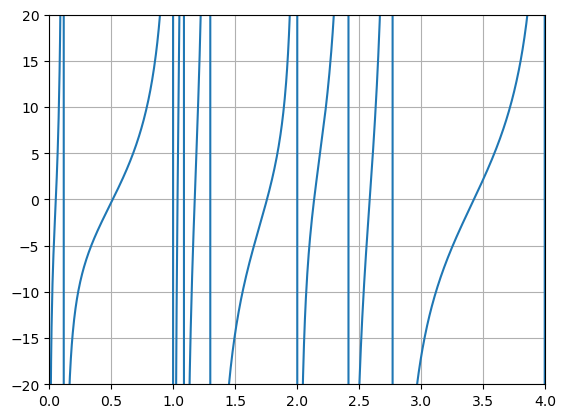

In [58]:
#plot zeta_plot 

plt.plot(q_2_plot, zeta_plot)
plt.ylim(-20,20)
plt.grid()
plt.xlim(0,4)



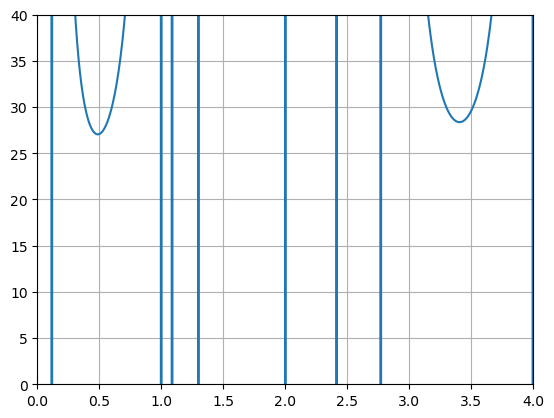

In [59]:
#first derivative of graph above

dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx

#plot first derivative

plt.plot(q_2_plot[:-1], dy_dx)
plt.ylim(0,40)
plt.xlim(0,4)
plt.grid()



1065.0726060364568
906.5527586126886
778.7696754991886
674.501933289573
588.4936980950134
516.8531689785617
456.65369571520927
405.6635605715614
362.15936019375124
324.79485682179086
292.50733905641493
264.4497895453831
239.94109088890607
218.429023941024
199.4624603396148
182.6702453261472
167.74500492881413
154.43061652183346
142.51243187401482
131.8095875694304
122.16891222131834
113.46006520229697
105.5716324876691
98.40797174616435
91.88664797136313
85.93633757586258
80.49510638251179
75.5089877692294
70.93080309662624
66.71917873030438
62.83772338106121
59.254336801751876
55.94062659956824
52.87141442014476
50.02431631544095
47.37938493256789
44.91880341667957
42.62662273092794
40.48853555504985
38.49168110469884
36.62447617312728
34.87646847977964
33.23820905171183
31.70114089106116
30.257501616884962
28.900238129921036
27.622931648073358
26.41973170980801
25.285297951114675
24.21474863647645
23.203615071264807
22.24780114690572
21.343547374945633
20.487398854971133
19.676176696

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/1426642200.py:48: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*r_parallel**(2*b)
/Users/ericrechberger/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


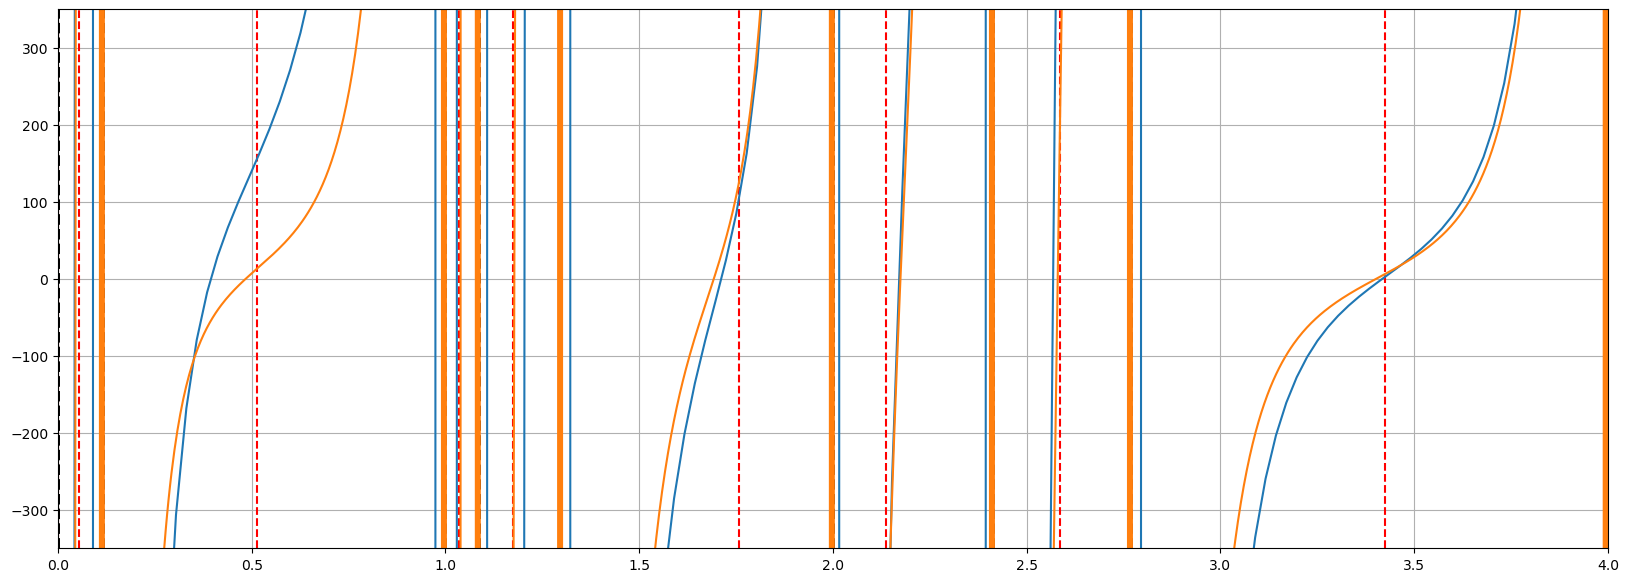

In [64]:
#derivative of first derivative 

dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx

dy_dx2 = np.diff(dy_dx)/dx


#plot second derivative

plt.figure(figsize=(20,7))

#plot zeros

for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')
    


#plot second_deriv for the range 0,4 on the same graph



q_2_plot2 = np.linspace(0.01,4,150)
scs = np.array([])


for q_2_i in q_2_plot2:
    scs = np.append(scs, second_deriv(d, q_2_i, 0.1, 1000))


#plot asymptotes
    
for asymptote in asymototes:
    plt.axvline(x=asymptote, color='black', linestyle='--', linewidth=2)

    
plt.plot(q_2_plot2, scs)


plt.plot(q_2_plot[:-2], dy_dx2)
plt.ylim(-350,350)
plt.xlim(0,4)
plt.grid()






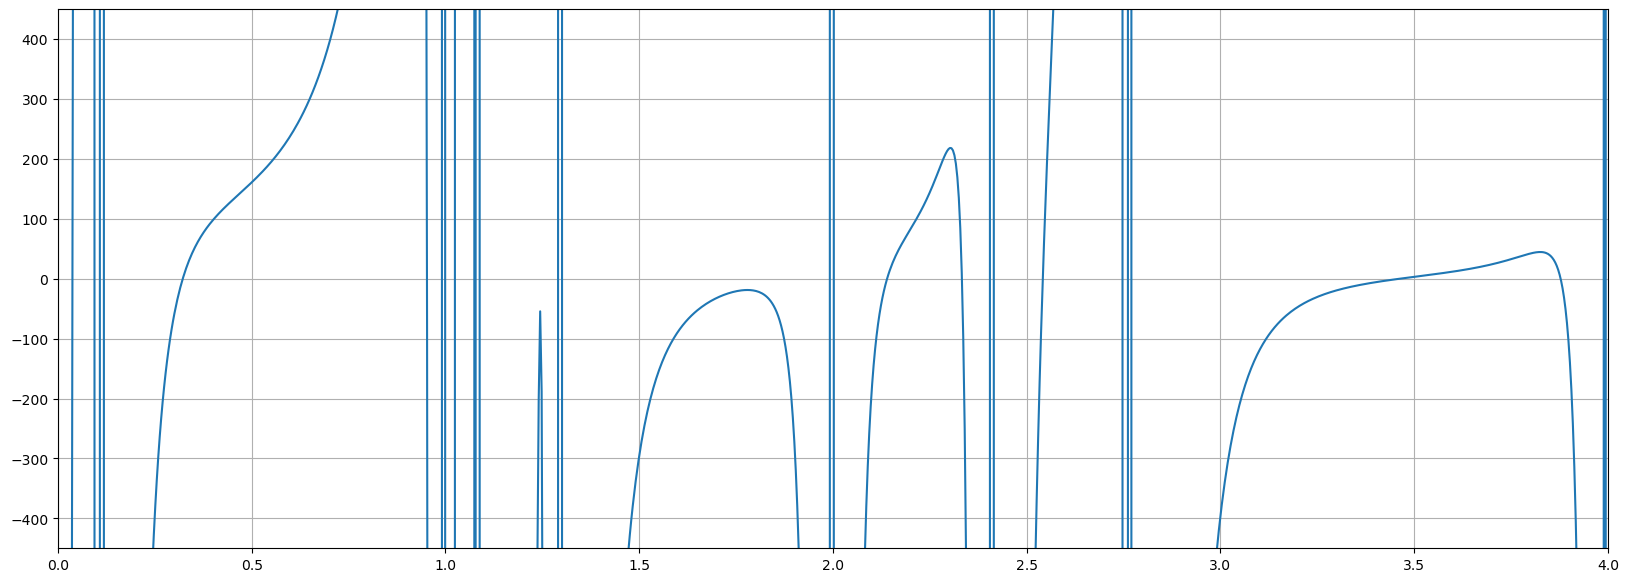

In [734]:
#plot difference between the two

max_x = 4

xs = q_2_plot[np.argwhere(q_2_plot<max_x)].flatten()

scs = np.array([])


for x in xs:
    scs = np.append(scs, second_deriv(d, x, 0.1, 100))

plt.figure(figsize=(20,7))
#plt.plot(xs, scs)
plt.plot(xs, scs-dy_dx2[:len(xs)])
plt.ylim(-450,450)
plt.xlim(0,4)
plt.grid()


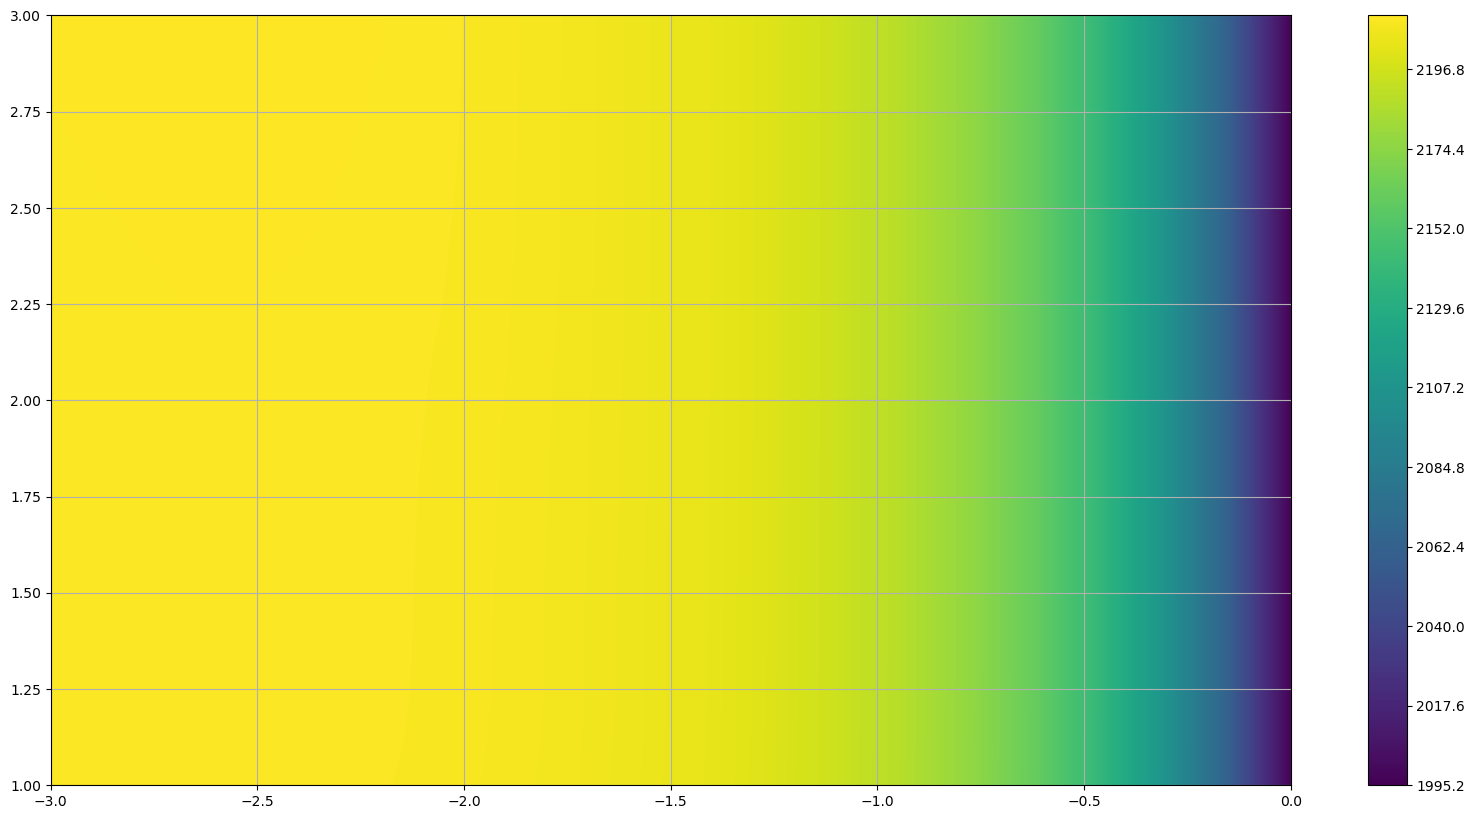

In [639]:

# make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000 for secind derivative

a = np.linspace(0,3,20)
k = np.linspace(1,3,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = second_deriv(d, roots[3] ,mesh1[i][j], mesh2[i][j])




mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)


#now plot

plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 300)
plt.colorbar()
plt.grid()


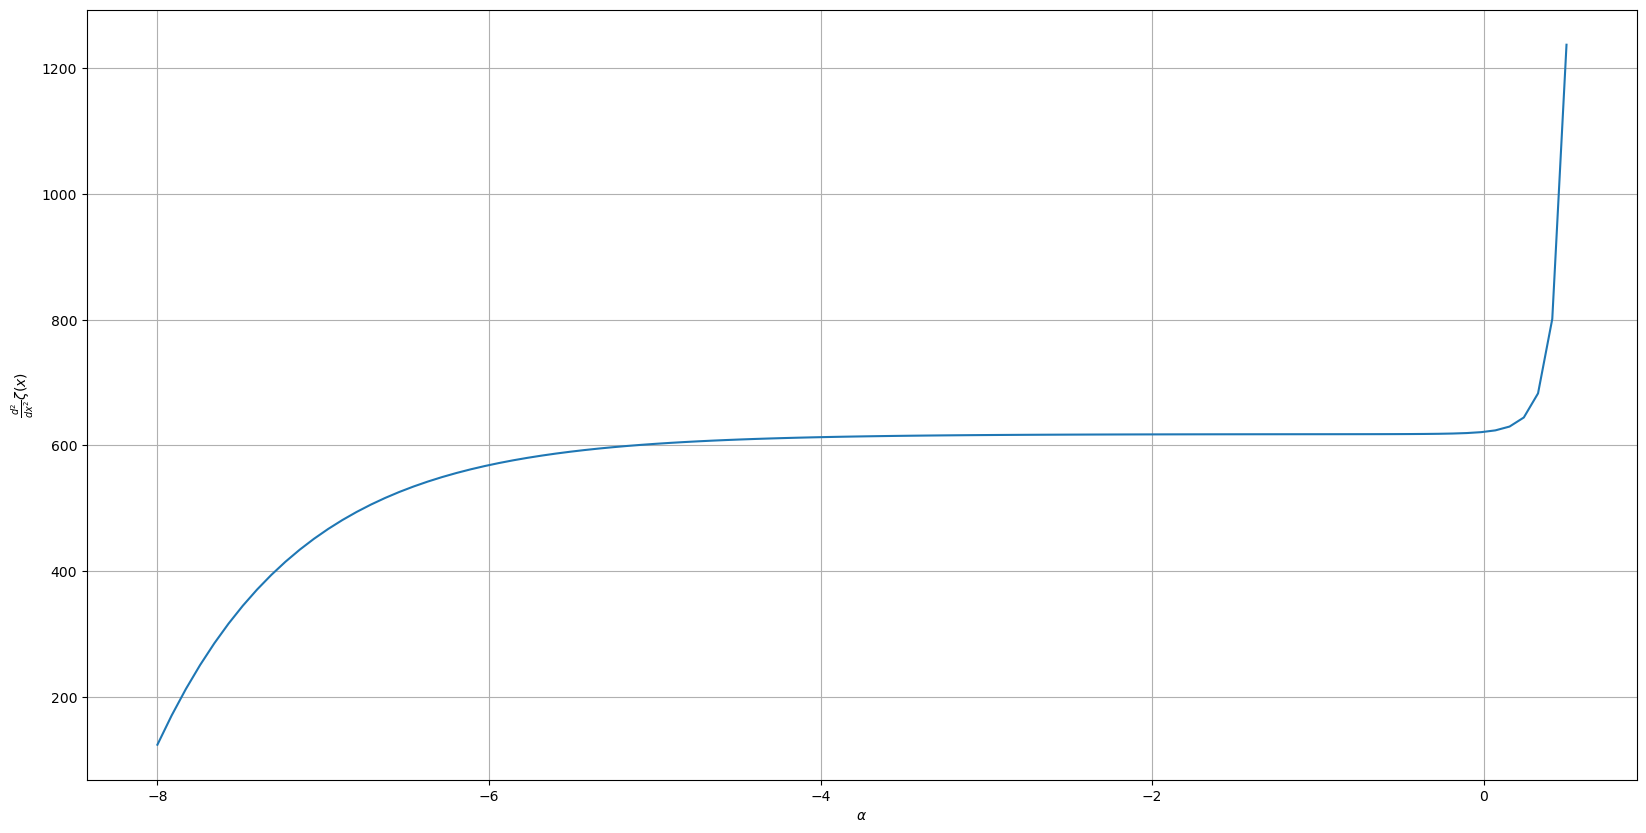

In [521]:

a = np.linspace(-0.5,8,100) # Specify the range of alpha values

alphas = 10**(-a)

cutoff = 100  # Set the cutoff value

#draw alpha vs second derivative 

plt.figure(figsize=(20,10))

alphas_vals = np.array([])
for alpha in alphas:
    alphas_vals = np.append(alphas_vals, second_deriv(d, roots[3], alpha, cutoff))


plt.plot(-a, alphas_vals)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\frac{d^2}{dx^2}\zeta(x)$')
plt.grid()
plt.show()





# Checking 1st derivative

In [47]:
### computing the second derivative of zeta

def sum_part_first(d, x, alpha, cutoff):

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 +s)

    beta = d_scalar/E

    A = 1+beta**4

    if d_scalar:
        B = -4/d_scalar**2*beta**4
        A_dx = -8/d_scalar**2*beta**6
        B_dx = 32/d_scalar**4*beta**6
    else: 
        B = 0
        A_dx = 0
        B_dx = 0


    Coefficient_matrix = np.array([[A*alpha, B*alpha],[A, B]])
          
    gs = np.zeros_like(Coefficient_matrix)


    for i in range(len(Coefficient_matrix)):
        for j in range(len(Coefficient_matrix[0])):
            gs[i][j] = g(i,j, x, d, alpha, cutoff)


    #print(Coefficient_matrix)
    #print(gs)
    #print(gs*Coefficient_matrix)

    return np.sum(gs*Coefficient_matrix)




def pv_part_first(d, x, alpha):
    ML = 4
    d = np.linalg.norm(d)
    s = 4*x + (ML/np.pi)**2
    gamma  = np.sqrt(1  + d**2/s)
    gamma_dx = -2 * d**2/gamma/s**2
    gamma_dx2 = 4 * d**2/(gamma*s**3) - d**4/(gamma**3*s**4)

    pv = -2.0*(np.pi**2)*np.sqrt(x)\
        * erfi(np.sqrt(alpha*x))\
        + 2.0*np.exp(alpha*x)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
    pv_dx2 = np.pi**2/2/np.sqrt(x**3)*erfi(np.sqrt(alpha*x)) - np.sqrt(np.pi**3*alpha)/x * np.exp(alpha*x)

    all = gamma*pv_dx + gamma_dx*pv 

    return all/np.sqrt(4*np.pi)


def first_deriv(d, x, alpha, cutoff):
    return sum_part_first(d, x, alpha, cutoff) - pv_part_first(d, x, alpha)

In [48]:
first_deriv(d, roots[2], 0.1, 1000)

27.12392962369897

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/1426642200.py:48: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*r_parallel**(2*b)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/737523063.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/737523063.py:57: RuntimeWarning: invalid value encountered in scalar multiply
  pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/737523063.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  pv_dx2 = np.pi**2/2/np.sqrt(x**3)*erfi(np.sqrt(alpha*x)) - np.sqrt(np.pi**3*alpha)/x * np.exp(alpha*x)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/737523063.py:58: RuntimeWarning: invalid value encountered in scalar multiply
  pv_dx2 = np.pi*

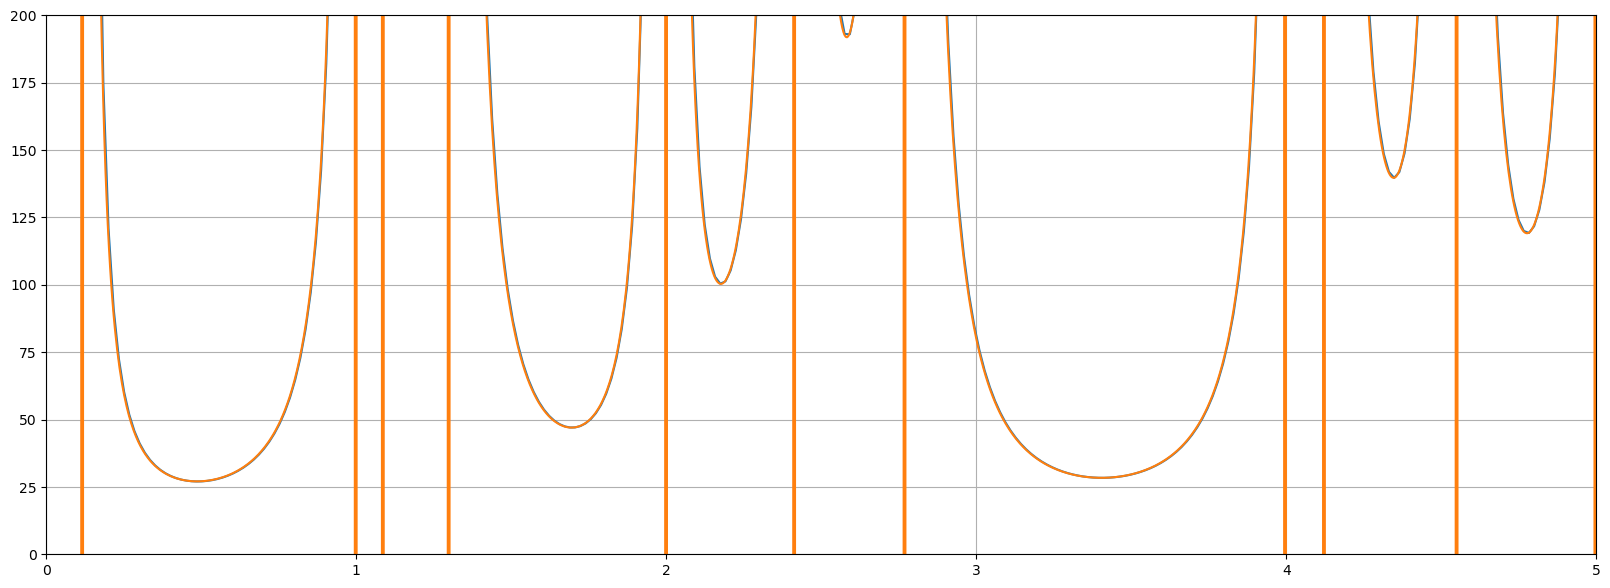

In [49]:

#compare first derivative to derivative_LT  

x = np.linspace(0,5,300)

plt.figure(figsize=(20,7))
plt.plot(x,[first_deriv(d, el, 0.1, 300) for el in x ])

dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx

plt.plot(q_2_plot[:-1], dy_dx)
plt.ylim(0,200)
plt.xlim(0,5)
plt.grid()


# Redefining g and second deriv

In [65]:
def g(a, b, x ,d, alpha, cutoff):
    
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*x + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    rho = r_parallel+ 1/2 * d_scalar
    r_parallel_star = 1/gamma*(rho)
    r_parallel_star_sq = r_parallel_star**2
    r_sq = r_parallel_star_sq+ r_perp_sq
    D = r_sq-x


    terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)

    return np.sum(terms_2)/np.sqrt(4*np.pi)

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/2223649817.py:49: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_59144/2223649817.py:49: RuntimeWarning: invalid value encountered in multiply
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)


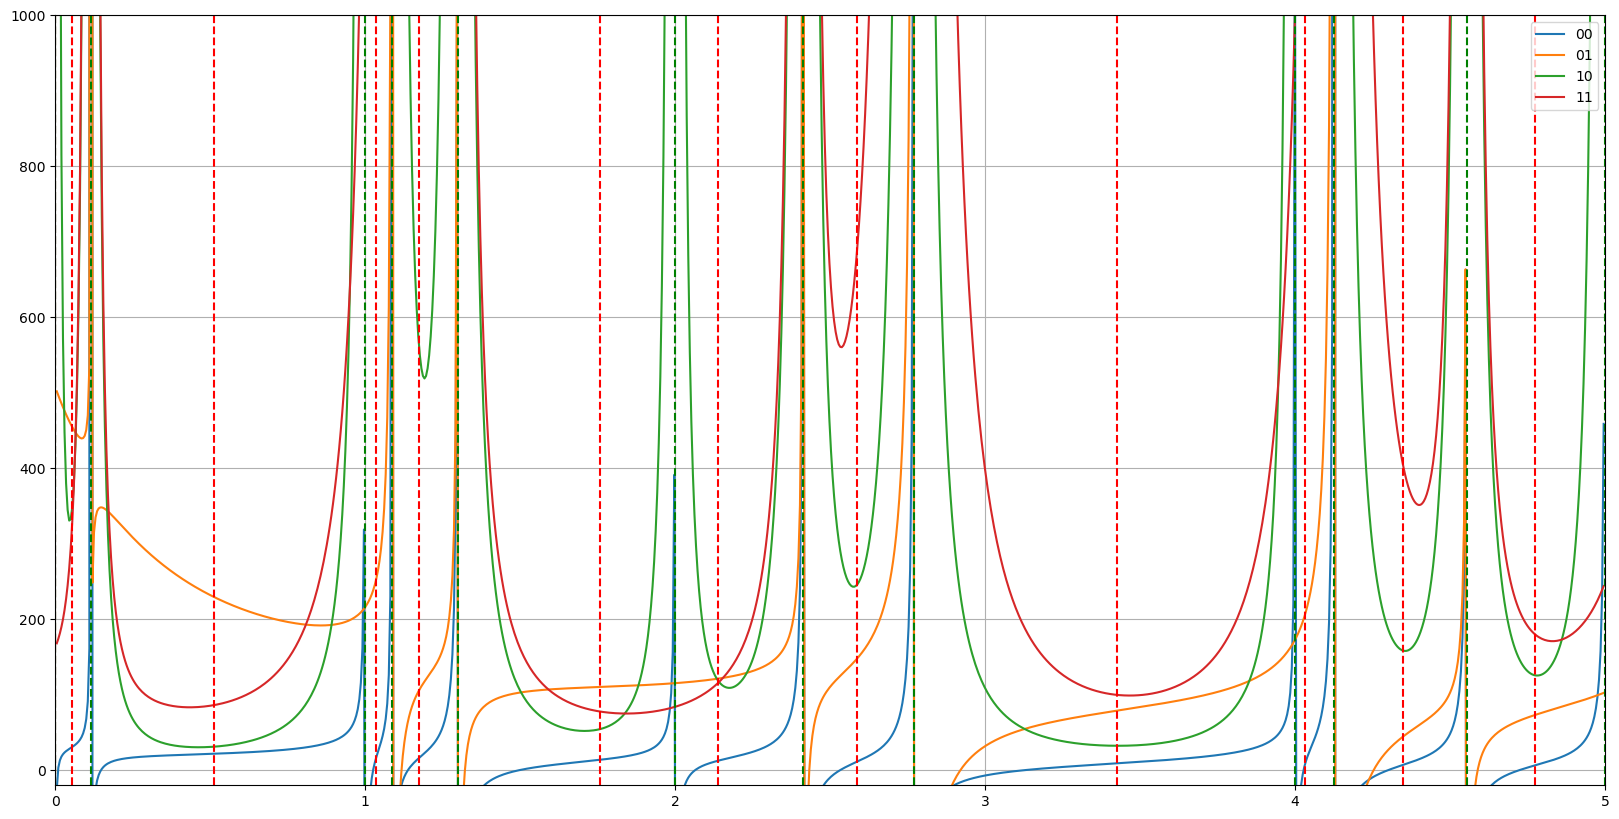

In [66]:

xs = np.linspace(0,5,1000)
plt.figure(figsize=(20,10))

for a in range(0,2):
    for b in range(0,2):
        
        #evaluate g for each a and b
        g_plot = np.array([])
        for x_i in xs:
            g_plot = np.append(g_plot, g(a,b, x_i,d, 0.1, 200))
        
        plt.plot(xs, g_plot, label = str(a) + str(b))


#plot asymptotes
        
for asymptote in asymototes:
    plt.axvline(x=asymptote, color='green', linestyle='--')

#plot zeros
    
for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')




plt.legend()
plt.xlim(xs[0], xs[-1])
plt.ylim(-20,1000)
plt.grid()


In [69]:
### computing the second derivative of zeta

def sum_part_second(d, x, alpha, cutoff):

    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 +s)

    beta = d_scalar/E

    A = 1

    if d_scalar:
        B = -4/d_scalar**2*beta**4
        A_dx = 0
        B_dx = 32/d_scalar**4*beta**6
    else: 
        B = 0
        A_dx = 0
        B_dx = 0


    Coefficient_matrix = np.array([[A_dx*alpha + A**2*alpha**2   ,  2*A*B*alpha**2 + B_dx * alpha   ,  B**2*alpha**2   ],
                                   [A_dx + 2*A**2*alpha,            B_dx + 4*A*B*alpha,                2*B**2*alpha    ],
                                   [ 2*A**2 ,                       4*A*B,                             2*B**2          ]])
                                
    gs = np.zeros_like(Coefficient_matrix)


    for i in range(len(Coefficient_matrix)):
        for j in range(len(Coefficient_matrix[0])):
            gs[i][j] = g(i,j, x, d, alpha, cutoff)


    #print(Coefficient_matrix)
    #print(gs)
    #print(gs*Coefficient_matrix)


    return np.sum(gs*Coefficient_matrix)




def pv_part_second(d, x, alpha):
    ML = 4
    d = np.linalg.norm(d)
    s = 4*x + (ML/np.pi)**2
    gamma  = np.sqrt(1  + d**2/s)
    gamma_dx = -2 * d**2/(gamma*s**2)
    gamma_dx2 = 4*d**4/(gamma**3*s**4) +24* d**2/(gamma*s**3)
    

    pv = -2.0*(np.pi**2)*np.sqrt(x)\
        * erfi(np.sqrt(alpha*x))\
        + 2.0*np.exp(alpha*x)\
        * np.sqrt(np.pi**3)/np.sqrt(alpha)
    pv_dx = -(np.pi**2)/np.sqrt(x) *erfi(np.sqrt(alpha*x))
    pv_dx2 = np.pi**2/2/np.sqrt(x**3)*erfi(np.sqrt(alpha*x)) - np.sqrt(np.pi**3*alpha)/x * np.exp(alpha*x)

    all = gamma*pv_dx2 + 2*gamma_dx*pv_dx + gamma_dx2*pv

    return all/np.sqrt(4*np.pi)


def second_deriv(d, x, alpha, cutoff):
    return sum_part_second(d, x, alpha, cutoff) - pv_part_second(d, x, alpha)

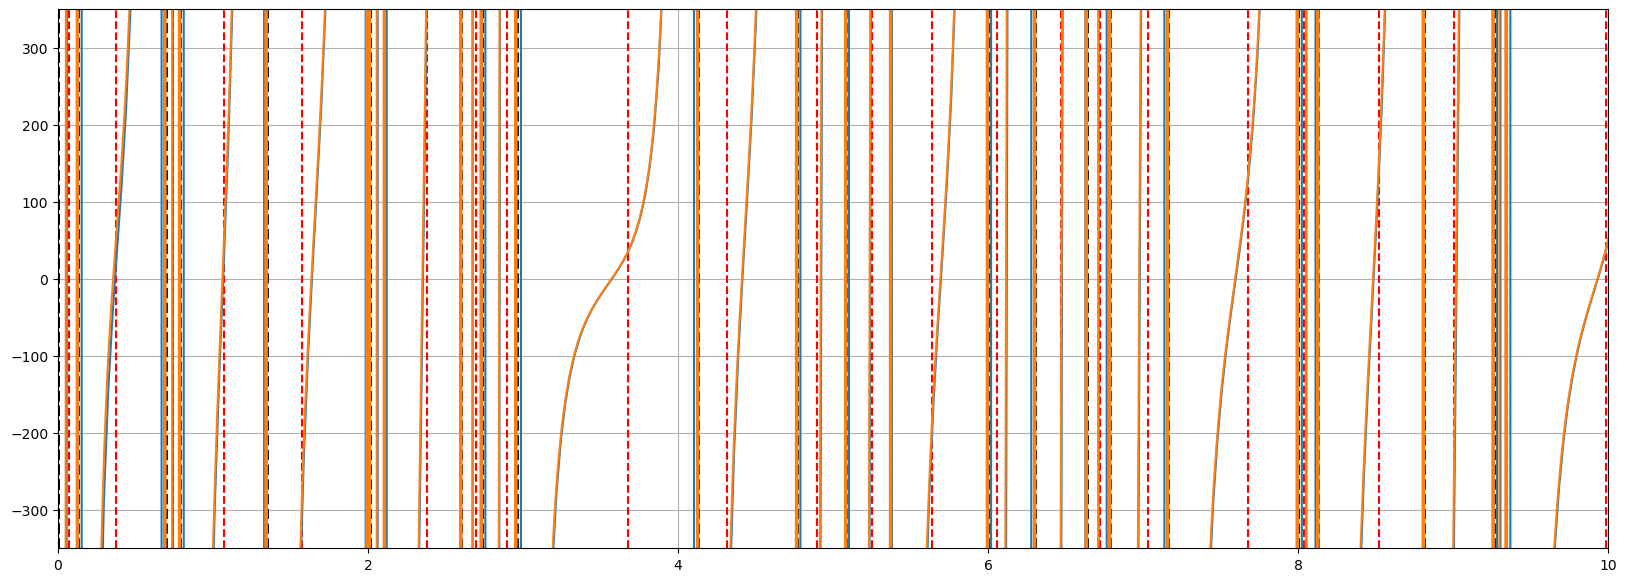

In [89]:
#derivative of first derivative 

dx = np.diff(q_2_plot)[0]

dy_dx = np.diff(zeta_plot)/dx

dy_dx2 = np.diff(dy_dx)/dx


#plot second derivative

plt.figure(figsize=(20,7))

#plot zeros

for root in roots:
    plt.axvline(x=root, color='red', linestyle='--')
    


#plot second_deriv for the range 0,4 on the same graph



q_2_plot2 = np.linspace(0.01,10,350)
scs = np.array([])


for q_2_i in q_2_plot2:
    scs = np.append(scs, second_deriv(d, q_2_i, 0.5, 1000))


#plot asymptotes
    
for asymptote in asymototes:
    plt.axvline(x=asymptote, color='black', linestyle='--', linewidth=2)

    
plt.plot(q_2_plot2, scs)


plt.plot(q_2_plot[:-2], dy_dx2)
plt.ylim(-350,350)
plt.xlim(0,q_2_plot2[-1])
plt.grid()






In [82]:
second_deriv(d, roots[2], 1, 10)

0.8911670410328227

Hurray, it agrees reasonably well!!

In [73]:
roots[2]

0.5124628833307125

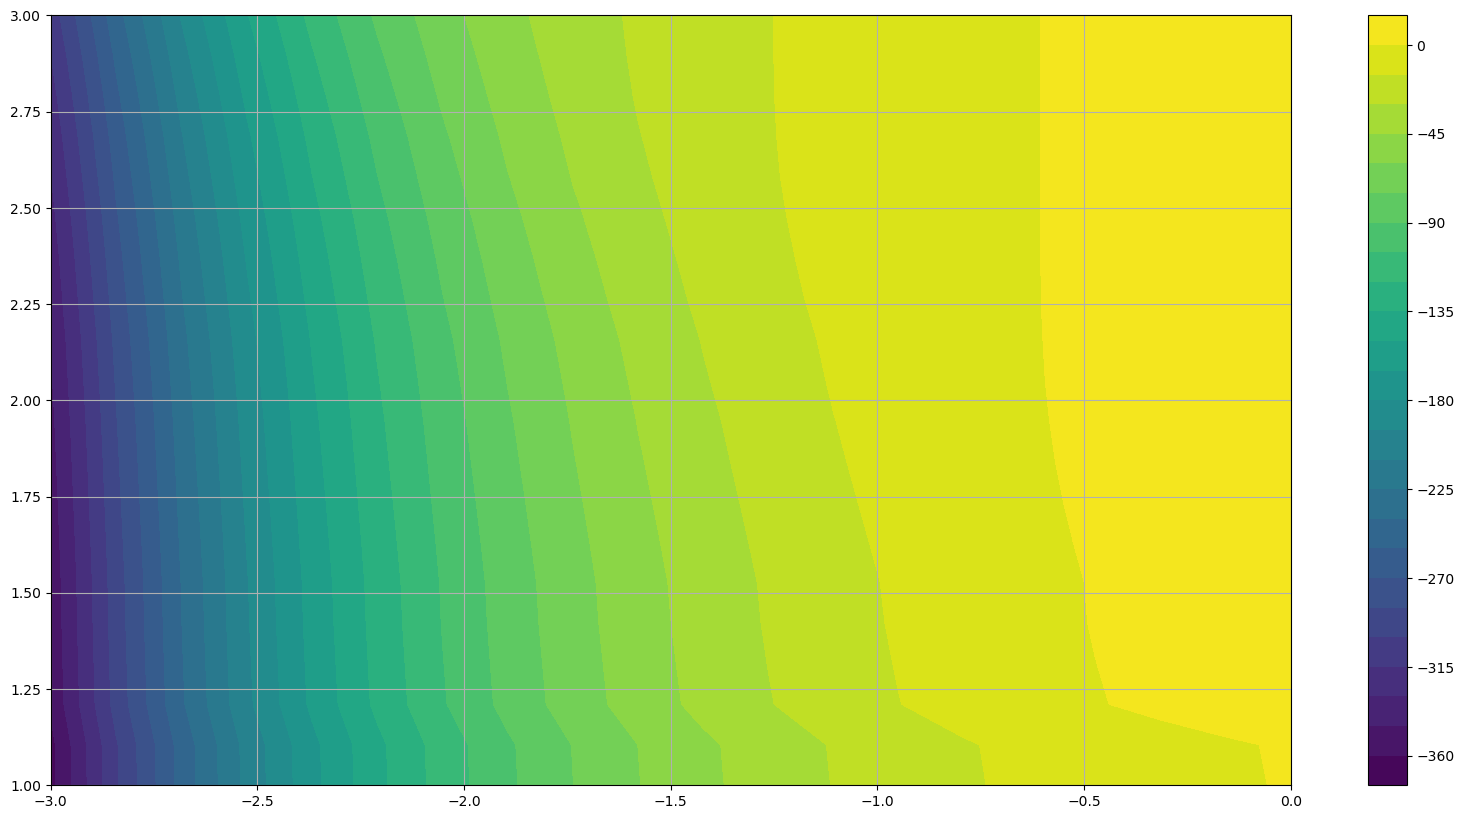

In [76]:

# make a contour plot of alpha varying between 0 and 1 and xi between 0 and 1000 for secind derivative

a = np.linspace(0,3,20)
k = np.linspace(1,3,20)

alpha = 10**(-a)
xi = 10**k

mesh1,mesh2 = np.meshgrid(alpha, xi)
#plot unsing meshgrid


first_deriv_plot = np.zeros_like(mesh1)

for i in range(len(mesh1)):
    for j in range(len(mesh1[0])):
        first_deriv_plot[i][j] = second_deriv(d, roots[2] ,mesh1[i][j], mesh2[i][j])




mesh1 = np.log10(mesh1)
mesh2 = np.log10(mesh2)


#now plot

plt.figure(figsize=(20,10))
plt.contourf(mesh1,mesh2,first_deriv_plot, levels = 30)
plt.colorbar()
plt.grid()


In [250]:
from sympy import symbols, Function, Derivative, sqrt
from itertools import permutations


def numbers(n,j):
    # Define the symbols
    x, d, m = symbols('x d m')

    # Define beta(x) and B(x)
    beta_x = d / sqrt(x + m**2 + d**2)
    B_x = -1/ (d**2) * beta_x**4


    #B_x = -1/(d**2+m**2+x)**2
    # Parameters: n = total elements, j = number of derivatives


    # Generate placeholders for derivatives ('D') and an additional 'B' for B(x)
    elements = ['D']*j + ['B']*(n-j)

    # Generate all unique permutations
    unique_permutations = set(permutations(elements))

    # Function to apply operations based on a sequence
    def apply_operations(sequence, func):
        result = func
        for op in reversed(sequence):  # Reverse to apply from right to left
            if op == 'D':
                result = Derivative(result, x)  # Define the derivative
            elif op == 'B':
                result  = result * B_x  # Multiply by B_x
        return result.doit()  # Simplify the derivative

    # Apply each permutation to B_x
    for perm in unique_permutations:
        # Append B_x to the end of each sequence explicitly
        operation_sequence = apply_operations(perm, B_x)
        #print(f"Sequence {perm}: {operation_sequence}")


    #sum all permutations
        
    #substitute 1 for x sum([apply_operations(perm, B_x) for perm in unique_permutations])
        
    return sum([apply_operations(perm, B_x) for perm in unique_permutations]).subs(x, 1)



In [251]:
print(numbers(3,2))

36*d**4/(d**2 + m**2 + 1)**6


In [288]:
from math import factorial as factorial
def n_choose_k(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))


def lah_numbers(n, k):
    return (-1)**n*n_choose_k(n-1, k-1)*factorial(n)/factorial(k)



In [286]:


for n in range(0,11):
    for j in range(n,-1,-1):
        print(numbers(n,j),end = ",  ")
    
    print("\n")

-d**2/(d**2 + m**2 + 1)**2,  

2*d**2/(d**2 + m**2 + 1)**3,  d**4/(d**2 + m**2 + 1)**4,  

-6*d**2/(d**2 + m**2 + 1)**4,  -6*d**4/(d**2 + m**2 + 1)**5,  -d**6/(d**2 + m**2 + 1)**6,  

24*d**2/(d**2 + m**2 + 1)**5,  36*d**4/(d**2 + m**2 + 1)**6,  12*d**6/(d**2 + m**2 + 1)**7,  d**8/(d**2 + m**2 + 1)**8,  

-120*d**2/(d**2 + m**2 + 1)**6,  -240*d**4/(d**2 + m**2 + 1)**7,  -120*d**6/(d**2 + m**2 + 1)**8,  -20*d**8/(d**2 + m**2 + 1)**9,  -d**10/(d**2 + m**2 + 1)**10,  

720*d**2/(d**2 + m**2 + 1)**7,  1800*d**4/(d**2 + m**2 + 1)**8,  1200*d**6/(d**2 + m**2 + 1)**9,  300*d**8/(d**2 + m**2 + 1)**10,  30*d**10/(d**2 + m**2 + 1)**11,  d**12/(d**2 + m**2 + 1)**12,  

-5040*d**2/(d**2 + m**2 + 1)**8,  -15120*d**4/(d**2 + m**2 + 1)**9,  -12600*d**6/(d**2 + m**2 + 1)**10,  -4200*d**8/(d**2 + m**2 + 1)**11,  -630*d**10/(d**2 + m**2 + 1)**12,  -42*d**12/(d**2 + m**2 + 1)**13,  -d**14/(d**2 + m**2 + 1)**14,  

40320*d**2/(d**2 + m**2 + 1)**9,  141120*d**4/(d**2 + m**2 + 1)**10,  141120*d**6/(d**2 + m

In [290]:


lah_numbers(4,4)


n_max = 11

for n in range(0,n_max):
    for k in range(1,n+1):
        print(int(lah_numbers(n,k)), end = ", ")
    print("\n")




-1, 

2, 1, 

-6, -6, -1, 

24, 36, 12, 1, 

-120, -240, -120, -20, -1, 

720, 1800, 1200, 300, 30, 1, 

-5040, -15120, -12600, -4200, -630, -42, -1, 

40320, 141120, 141120, 58800, 11760, 1176, 56, 1, 

-362880, -1451520, -1693440, -846720, -211680, -28224, -2016, -72, -1, 

3628800, 16329600, 21772800, 12700800, 3810240, 635040, 60480, 3240, 90, 1, 



In [4]:
# 10 choose 5

from math import factorial as f

#create a function to calculate n choose k

def n_choose_k(n,k):
    return f(n)/(f(k)*f(n-k))

118800/n_choose_k(10,3)





990.0

In [149]:
import numpy as np
print(np.array([24,240,1200,4200,11760,28224])//24)

[   1   10   50  175  490 1176]


In [151]:
2520*24

60480

In [154]:
15120/720

21.0

In [158]:
4200/630

6.666666666666667

In [106]:
#list prime factors

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

prime_factors(227082240.0)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 7, 11.0]

In [107]:
227082240.0/4**(5)

221760.0

In [110]:
prime_factors(221760.0)

[2, 2, 2, 2, 2, 2, 3, 3, 5, 7, 11.0]

In [160]:
12600/120

105.0

In [ ]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]


In [73]:
1176/56

21.0

In [76]:
2016/72

28.0

In [162]:
def next_eulerian_row(previous_row):
    # Initialize the next row with 1 at the start
    next_row = [1]
    
    # Calculate each term in the next row using the recurrence relation
    for i in range(1, len(previous_row)):
        next_term = (i + 1) * previous_row[i] + (len(previous_row) - i) * previous_row[i - 1]
        next_row.append(next_term)
    
    # The last term in the Eulerian row is always 1
    next_row.append(1)
    
    return next_row

# Last known row
last_row = [1,  -56,  1176,  -11760,  58800,  -141120,  141120,  -40320]
# Calculate the next row
next_row = next_eulerian_row(last_row)

print("Next row:", next_row)


Next row: [1, -105, 3192, -41160, 246960, -670320, 705600, -181440, 1]


In [207]:
lah_numbers(4,4)

for n in range(1,12):
    for k in range(1,n+1):
        print(int(lah_numbers(n,k)), end = ", ")
    print("\n")

1, 

2, 1, 

6, 6, 1, 

24, 36, 12, 1, 

120, 240, 120, 20, 1, 

720, 1800, 1200, 300, 30, 1, 

5040, 15120, 12600, 4200, 630, 42, 1, 

40320, 141120, 141120, 58800, 11760, 1176, 56, 1, 

362880, 1451520, 1693440, 846720, 211680, 28224, 2016, 72, 1, 

3628800, 16329600, 21772800, 12700800, 3810240, 635040, 60480, 3240, 90, 1, 

39916800, 199584000, 299376000, 199584000, 69854400, 13970880, 1663200, 118800, 4950, 110, 1, 



In [265]:

i = 1

n = 3
j = 2

lah_numbers(n-j,i)*n_choose_k(n, j)

3.0

In [291]:
#C_0_i^n

def C_0_i_n(n,i):
    d = 3
    for j in range(0, n-i+1):
        m = n-j
        coeffs  = lah_numbers(m,i)*n_choose_k(n, j)
        print(coeffs)


In [299]:
C_0_i_n(10,1)

3628800.0
-3628800.0
1814400.0
-604800.0
151200.0
-30240.0
5040.0
-720.0
90.0
-10.0


In [300]:
from sympy import symbols, Function, Derivative, sqrt
from itertools import permutations

In [427]:
from sympy import symbols, binomial, factorial, Sum, IndexedBase, diff, Matrix, init_printing

# Initialize pretty printing
init_printing(use_unicode=True)

# Define symbols
n, b, a, d, alpha, beta = symbols('n b a d alpha beta')

# Lah numbers function
def Lah(n, k):
    result = ((-1)**n * binomial(n - 1, k - 1) * factorial(n) / factorial(k)).doit()
    return result
# 0th row function



    
def K0b(n, b):
    print(n)
    res = 0  # Initialize res
    for k in range(0, n - b + 1):
        res += binomial(n, k) * alpha**(k + b) * Lah(n - k, b) * (4/d**2)**(n - k) * (beta**2)**(n - k + b)
    return res

# Coefficient matrix K0
def K0(n):
    return [K0b(n, b) for b in range(1,n + 1)]

# Differentiated coefficient matrix K
def K(n):
    K0_expr = K0(n)
    # Initialize an empty matrix to store the results
    result_matrix = []
    for a in range(len(K0_expr)+1):
        # Check if the expression is not zero

        # Differentiate and append the row to the result matrix
        row = [diff(K0_expr[a], alpha, b) if a > 1 else K0_expr[a] for b in range(0,n )]
        result_matrix.append(row)

    return Matrix(result_matrix)

# Example usage
n_value = 2
print(K0(1))


print("K0({}):".format(n_value))
display(K0b(n_value,0))  # Use display for pretty printing in Jupyter, print otherwise
print("K({}):".format(n_value))
display(K(n_value))  # Use display for pretty printing in Jupyter, print otherwise


1
[-4*alpha*beta**4/d**2]
K0(2):
2


K(2):
2
2


IndexError: list index out of range

In [ ]:
##import data from file if exists

folder_name = "d_" + str(d).replace(" ", "").replace("[", "").replace("]", "")
path = "roots_zeta/" + folder_name + "/data.npz"
data = np.load(path)

q_2 = data['q_2']
z_d_results = data['z_d_results']
roots = data['zeros']
asymototes = data['asymptotes']
q_2_plot = np.copy(q_2)
zeta_plot = np.copy(z_d_results)

nth_root = 0
x_0  = roots[nth_root]


In [419]:
from sympy import symbols, binomial, factorial, Sum, IndexedBase, diff, Matrix, init_printing

# Initialize pretty printing
init_printing(use_unicode=True)

# Define symbols
n, b, a, d, alpha, beta = symbols('n b a d alpha beta')

# Lah numbers function
def Lah(n, k):
    result = (-1)**n * binomial(n - 1, k - 1) *factorial(n) / factorial(k)
    return result

# 0th row function



Lah(2,1)

In [414]:
binomial(0,0)

In [417]:
binomial(1,0)